Code <span class="caret"></span>

-   <a href="#" id="rmd-show-all-code">Show All Code</a>
-   <a href="#" id="rmd-hide-all-code">Hide All Code</a>
-   
-   <a href="#" id="rmd-download-source">Download Rmd</a>

# Time Series

[**Download chapter PDF
(.pdf).**](https://drive.usercontent.google.com/u/1/uc?id=1uGNrYk3BZdz5MTXJ6rk-0lSpheoBMx7B&export=download)

[**Download chapter notebook
(.ipynb).**](https://drive.usercontent.google.com/u/1/uc?id=1unEZmPfb0eoluiRN0it4wVDcngFkXmxO&export=download)

[<span style="color: rgb(255, 0, 0);">**Mandatory Lesson Feedback
Survey**</span>](https://docs.google.com/forms/d/e/1FAIpQLSdr0capF7jloJhPH3Pki1B3LZoKOG16poOpuVJ7SL2LkwLHQA/viewform?pli=1)

-   How is time series data visualised?
-   Why is it necessary to filter the data?
-   How do we study correlation among time series data points?

-   Learning ways to display multiple time series.
-   Understanding why filtering is required.
-   Explaining the Fourier spectrum of a time series.
-   Acquiring knowledge of correlation matrices of time series data.

  

  

  

## Prerequisites

-   [Dataframes 1 and 2](01-data_frames_1.Rmd)
-   [Image Handling](03-image_handling.Rmd)
-   [Basics of Numpy Arrays]()

``` python
from pandas import read_csv

from numpy import arange, zeros, linspace, sin, pi, c_, mean, var, array
from numpy import correlate, corrcoef, fill_diagonal, amin, amax, asarray
from numpy import around
from numpy.ma import masked_less, masked_greater

from matplotlib.pyplot import subplots, yticks, legend, axis, figure, show
```

## Python Function

Please execute code below, which defines a function of our own called
`plot_series`, before proceeding any further. This function code takes
data and creates a plot of all columns as time series, laid out one
above the other. When you execute the function code nothing happens.
Similar to an import statement, running a function code will only
activate it, making it available subsequent use. To action the function
itself, you must call this after it has been successfully defined

``` python
def plot_series(data, sr):
    '''
    Time series plot of multiple time series
    Data are normalised to mean=0 and var=1

    data: nxm numpy array. Rows are time points, columns are recordings
    sr: sampling rate, same time units as period
    '''

    samples = data.shape[0]
    sensors = data.shape[1]

    period = samples // sr

    time = linspace(0, period, period*sr)

    offset = 5 # for mean=0 and var=1 normalised data

    # Calculate means and standard deviations of all columns
    means = data.mean(axis=0)
    stds = data.std(axis=0)

    # Plot each series with an offset
    fig, ax = subplots(figsize=(7, 8))

    ax.plot(time, (data - means)/stds + offset*arange(sensors-1,-1,-1));

    ax.plot(time, zeros((samples, sensors)) + offset*arange(sensors-1,-1,-1),'--',color='gray');

    yticks([]);

    names = [str(x) for x in range(sensors)]
    legend(names)

    ax.set(xlabel='Time')

    axis('tight');

    return fig, ax
```

## Example: Normal and Pathological EEG

As an example, let us import two sets of time series data and convert
these into NumPy arrays, that we will call *data_back* and *data_epil*.
They represent a human electroencephalogram (EEG), as recorded during
normal *background* activity and during an epileptic seizure, referred
to as an *absence* seizure.

``` python
df_back = read_csv("data/EEG_background.txt", delim_whitespace=True)
df_epil = read_csv("data/EEG_absence.txt", delim_whitespace=True)

sr = 256     # 1 / seconds
period = 6   # seconds
channels = 10

d1 = df_back.to_numpy()
d2 = df_epil.to_numpy()

data_back = d1[:period*sr:, :channels]
data_epil = d2[:period*sr:, :channels]
```

The `read_csv` function is called in combination with the keyword
argument `delim_whitespace`. When its value is set to `True`, this
allows the user to import data that are space-separated (rather than
comma-separated). If you eyeball the contents of the `data .txt` files,
you will notice that the numbers (which represent voltages) are indeed
separated by spaces, not commas.

Next, three constants are assigned: The sampling rate (sr) is given in
the number of samples recorded per second; the duration of the recording
(period) which is given in seconds; and the number of columns
(channels), to be extracted from the recording. Let’s make use of the
first 10 columns of data for the remainder of this lesson.

The data are then converted from Pandas DataFrame into a NumPy array.

To see the names of the channels (or recording sensors) we can use the
`head` method as follows:.

``` python
df_back.head()
```

       FP1      FP2        F3       F4  ...      EO2      EM1      EM2      PHO

0 -7.4546 22.8428 6.28159 15.6212 … 13.7021 12.9109 13.7034 9.37573 1
-11.1060 21.4828 6.89088 15.0562 … 13.7942 13.0194 13.7628 9.44731 2
-14.4000 20.0907 7.94856 14.1624 … 13.8982 13.1116 13.8239 9.51796 3
-17.2380 18.7206 9.36857 13.0093 … 14.0155 13.1927 13.8914 9.58770 4
-19.5540 17.4084 11.06040 11.6674 … 14.1399 13.2692 13.9652 9.65654

\[5 rows x 28 columns\]

The row indices and column names for the seizure data look the same. The
names of the recording channels are from the commonly used [10-20
system](https://en.wikipedia.org/wiki/10%E2%80%9320_system_(EEG)) used
to record voltages of brain activity from the human scalp. As an
example, ‘F’ stands for the frontal lobe.

Next, we can call and make use of the plot function that we defined in
the first block of code, above, in order to plot the data. If we examine
the code in which we defined this function, you can see that we have set
it to require the specification of two input arguments: these correspond
to the dataset and sampling rate.

``` python
plot_series(data_back, sr)
show()
```

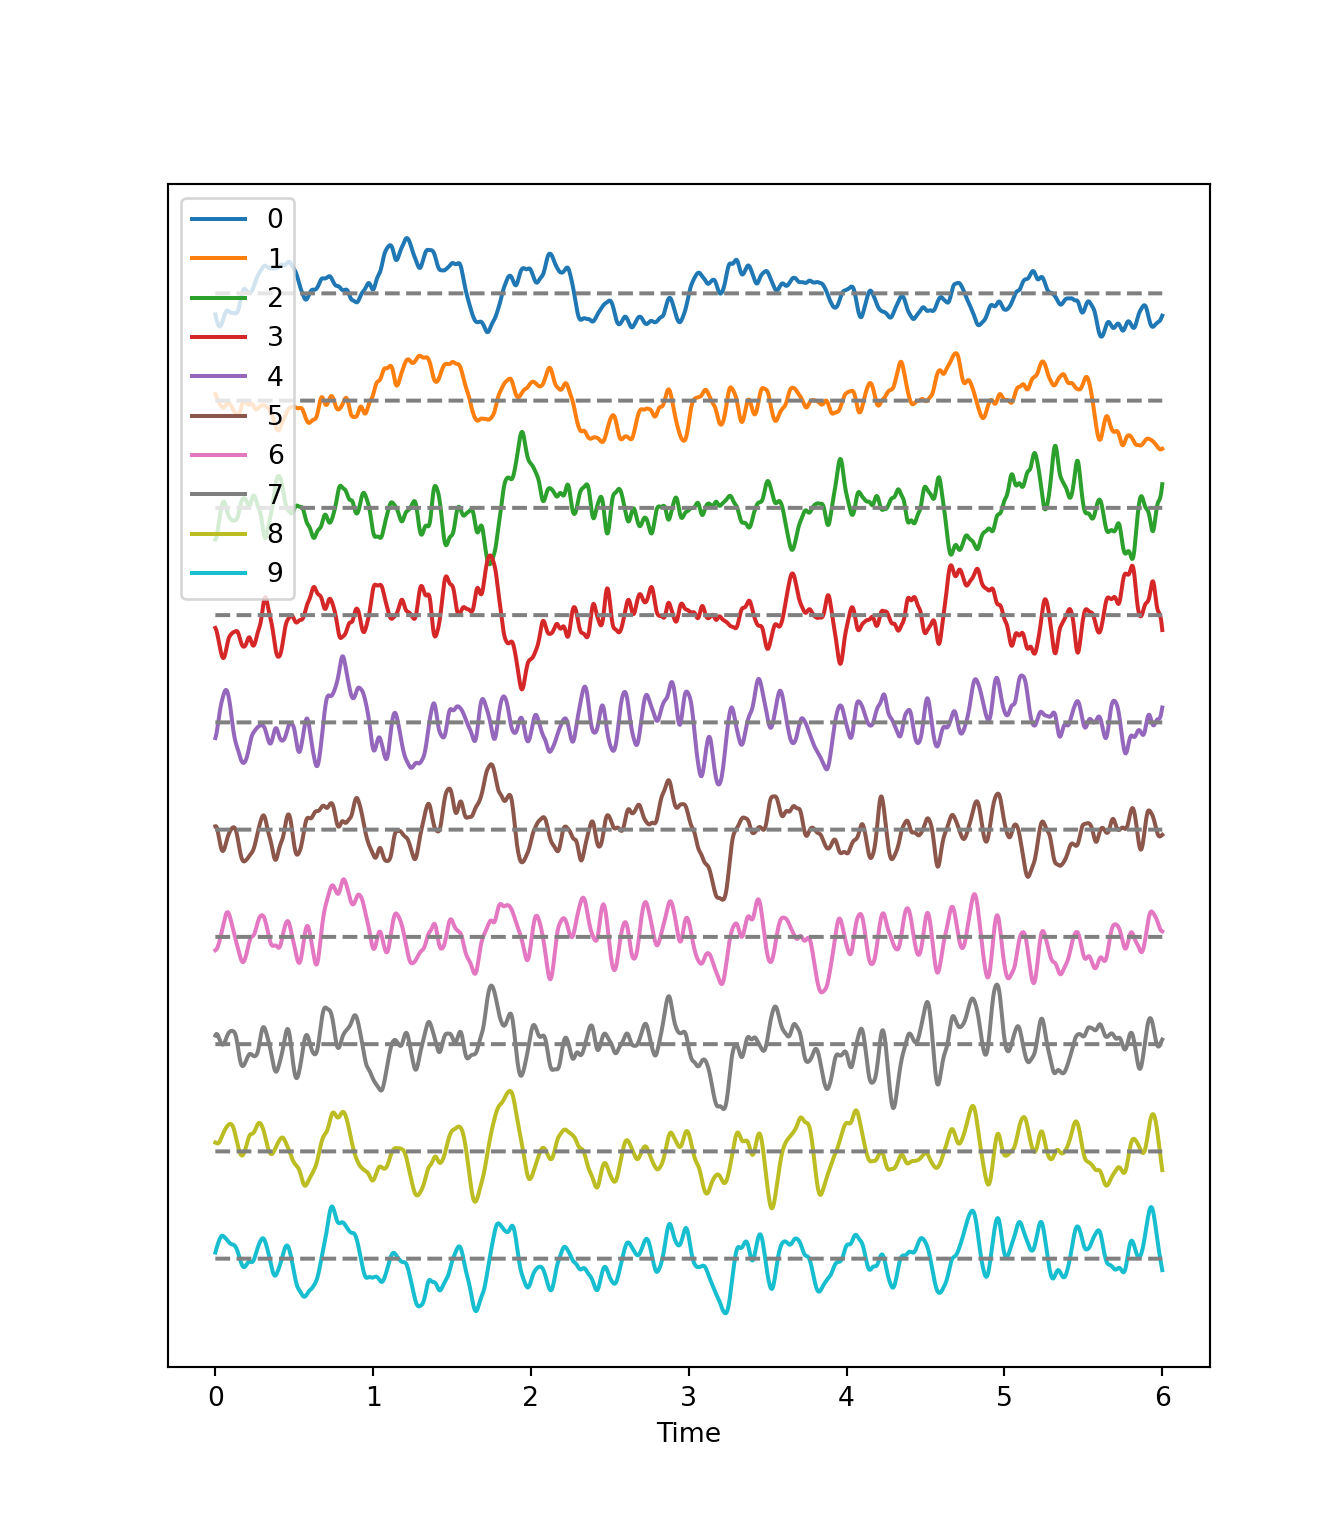

``` python
plot_series(data_epil, sr);
show()
```

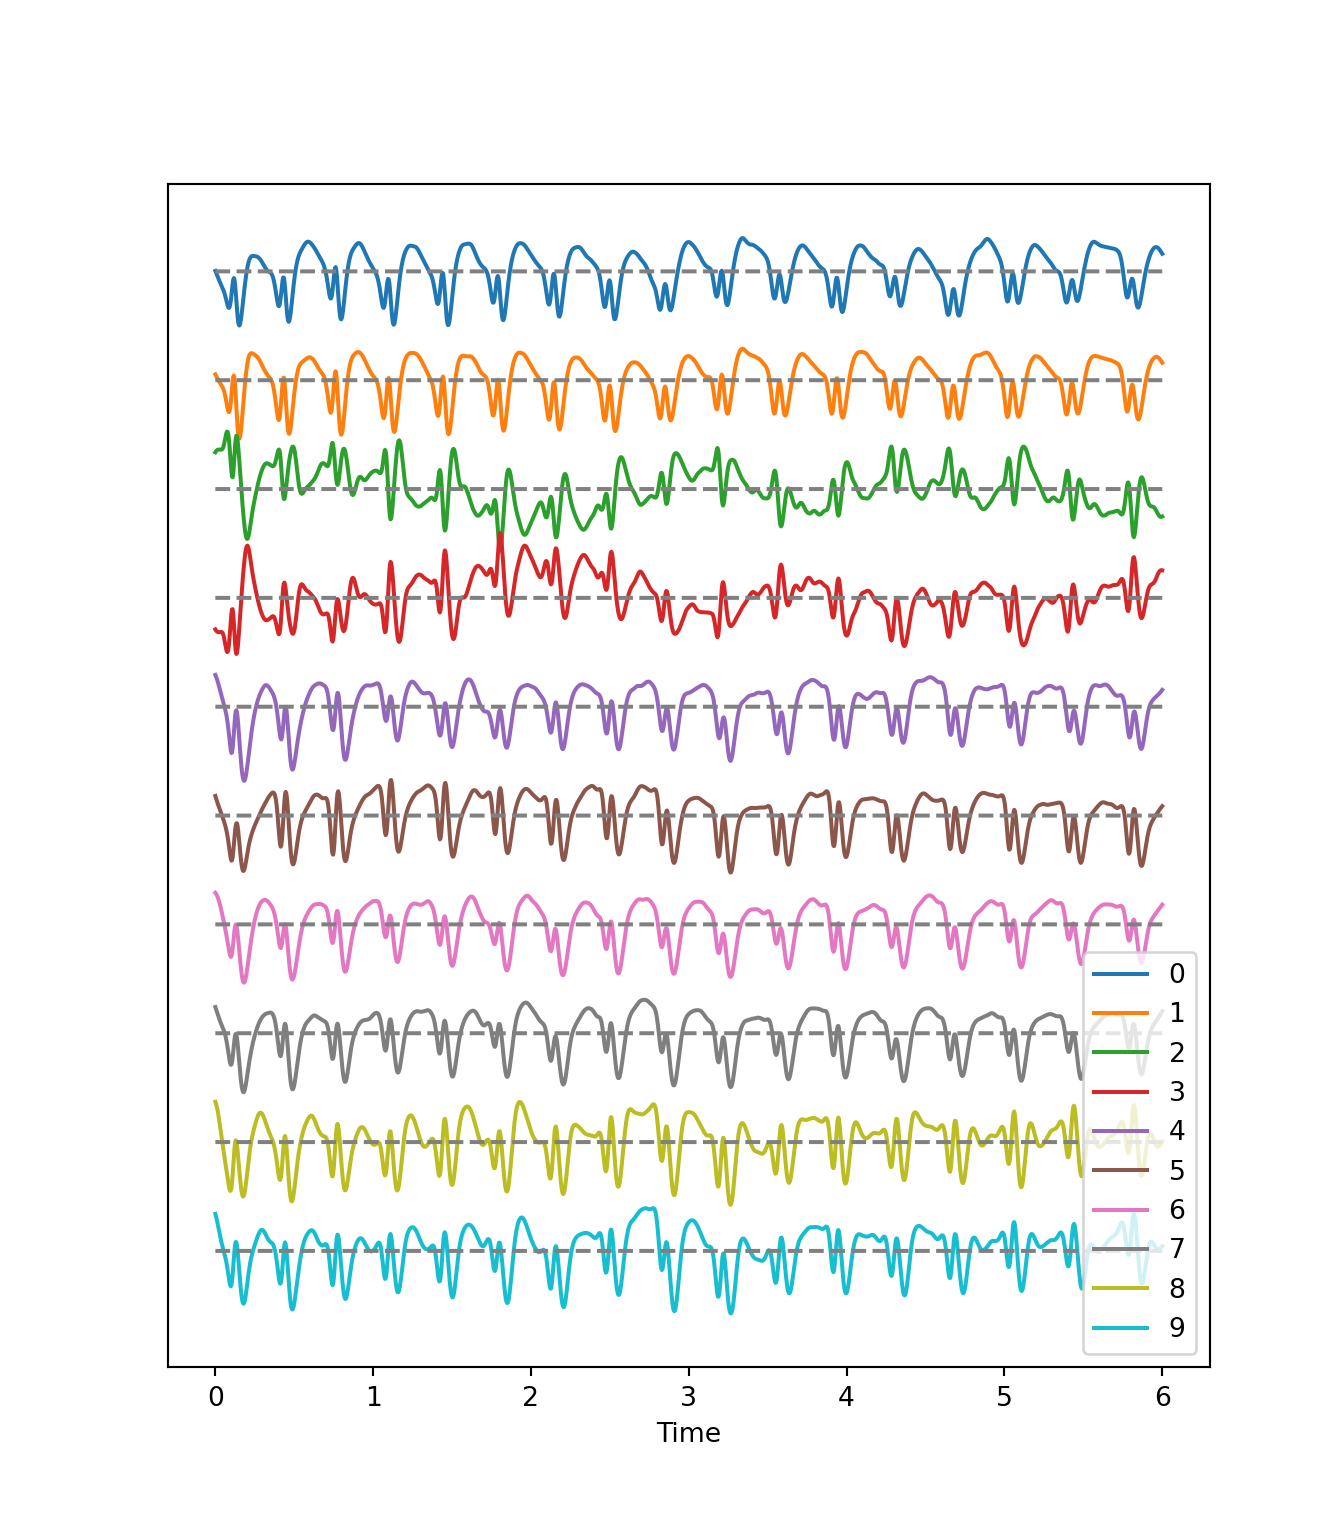

**Observations**

1.  Background:

-   There are irregular oscillations of all recorded brain potentials.

-   Oscillations recorded at different locations above the brain,
    differ.

-   Oscillations are not stable, but are modulated over time.

-   There are different frequency components evident in each trace.

1.  Epileptic Seizure:

-   There are regular oscillations.

-   Oscillations recorded at different locations are not identical but
    similar or at least related in terms of their shape.

-   Despite some modulation, the oscillations are fairly stable over
    time.

-   There are repetitive motifs comprising two major components
    throughout the recording, a sharp *spike* and a slow *wave*.

**Task**

Quantify features of these time series data to obtain an overview of the
data. For a univariate feature we can use the frequency content. This
takes into account the fact that the rows (or samples) are not
independent of each other but are organised along the time axis. In
consequence, there are correlations between data points along the rows
of each column and the **Fourier spectrum** can be used to identify
these.

The Fourier spectrum assumes that the data are stationary and can be
thought of as a superposition of regular sine waves with different
frequencies. Its output will show which of the frequencies are present
in the data and also their respective amplitudes. The Fourier spectrum
is obtained through mathematical processes collectively known as the
Fourier Transform, where a signal is decomposed into its constituent
frequencies, allowing each individual frequency component to be analysed
and inferences to be made regarding its periodic characteristics.

For a bivariate feature, we can use the cross-correlation matrix.

## Work-Through Example

Check the NumPy array containing the background and seizure data.

``` python
print(data_back.shape, data_epil.shape)
```

(1536, 10) (1536, 10)

There are 1536 rows and 10 columns.

### **Display data with offset**

Take a look at the code used to define the function `plot_series`.
Again, this is the function we are using to create the time series plot.
It requires the input of a data file where the row index is interpreted
as time. In addition, the sampling rate (sr) is required in order to
extract the time scale. The sampling rate specifies the number of
samples recorded per unit time.

The sensors, or recording channels, are assumed to be in the columns.

``` python
def plot_series(data, sr):
    '''
    Time series plot of multiple time series
    Data are normalised to mean=0 and var=1

    data: nxm numpy array. Rows are time points, columns are channels
    sr: sampling rate, same time units as period
    '''

    samples = data.shape[0]
    sensors = data.shape[1]

    period = samples // sr

    time = linspace(0, period, period*sr)

    offset = 5 # for mean=0 and var=1 normalised data

    # Calculate means and standard deviations of all columns
    means = data.mean(axis=0)
    stds = data.std(axis=0)

    # Plot each series with an offset
    fig, ax = subplots(figsize=(7, 8))

    ax.plot(time, (data - means)/stds + offset*arange(sensors-1,-1,-1));

    ax.plot(time, zeros((samples, sensors)) + offset*arange(sensors-1,-1,-1),'--',color='gray');

    yticks([]);

    names = [str(x) for x in range(sensors)]
    legend(names)

    ax.set(xlabel='Time')

    axis('tight');

    return fig, ax
```

The declaration syntax `def` is followed by the function name and, in
parentheses, the input arguments. This is completed with a colon.

Following the declaration line, the function’s documentation or
docstring is contained within two lines of triple backticks. This
explains the function’s operation, arguments and use – and can contain
any other useful information pertaining to the operation of the defined
function.

Followin the docstring, the main lines of code that operate on the
arguments provided by the user, when the function is called.

The function can then be closed using the optional output syntax
`return` and any number of returned variables, anything that might be
used as a product of running the function.

In our example, the figure environment and the coordinate system are
‘returned’ and can, in principle, be used to further modify the plot.

The code below illustrates how to call the function and then add a title
and the sensor names to the displayed output:

``` python
(fig, ax) = plot_series(data_epil, sr)

names = df_back.columns[:channels]

fig.suptitle('Recording of Absence Seizure', fontsize=16);

legend(names);

show()
```

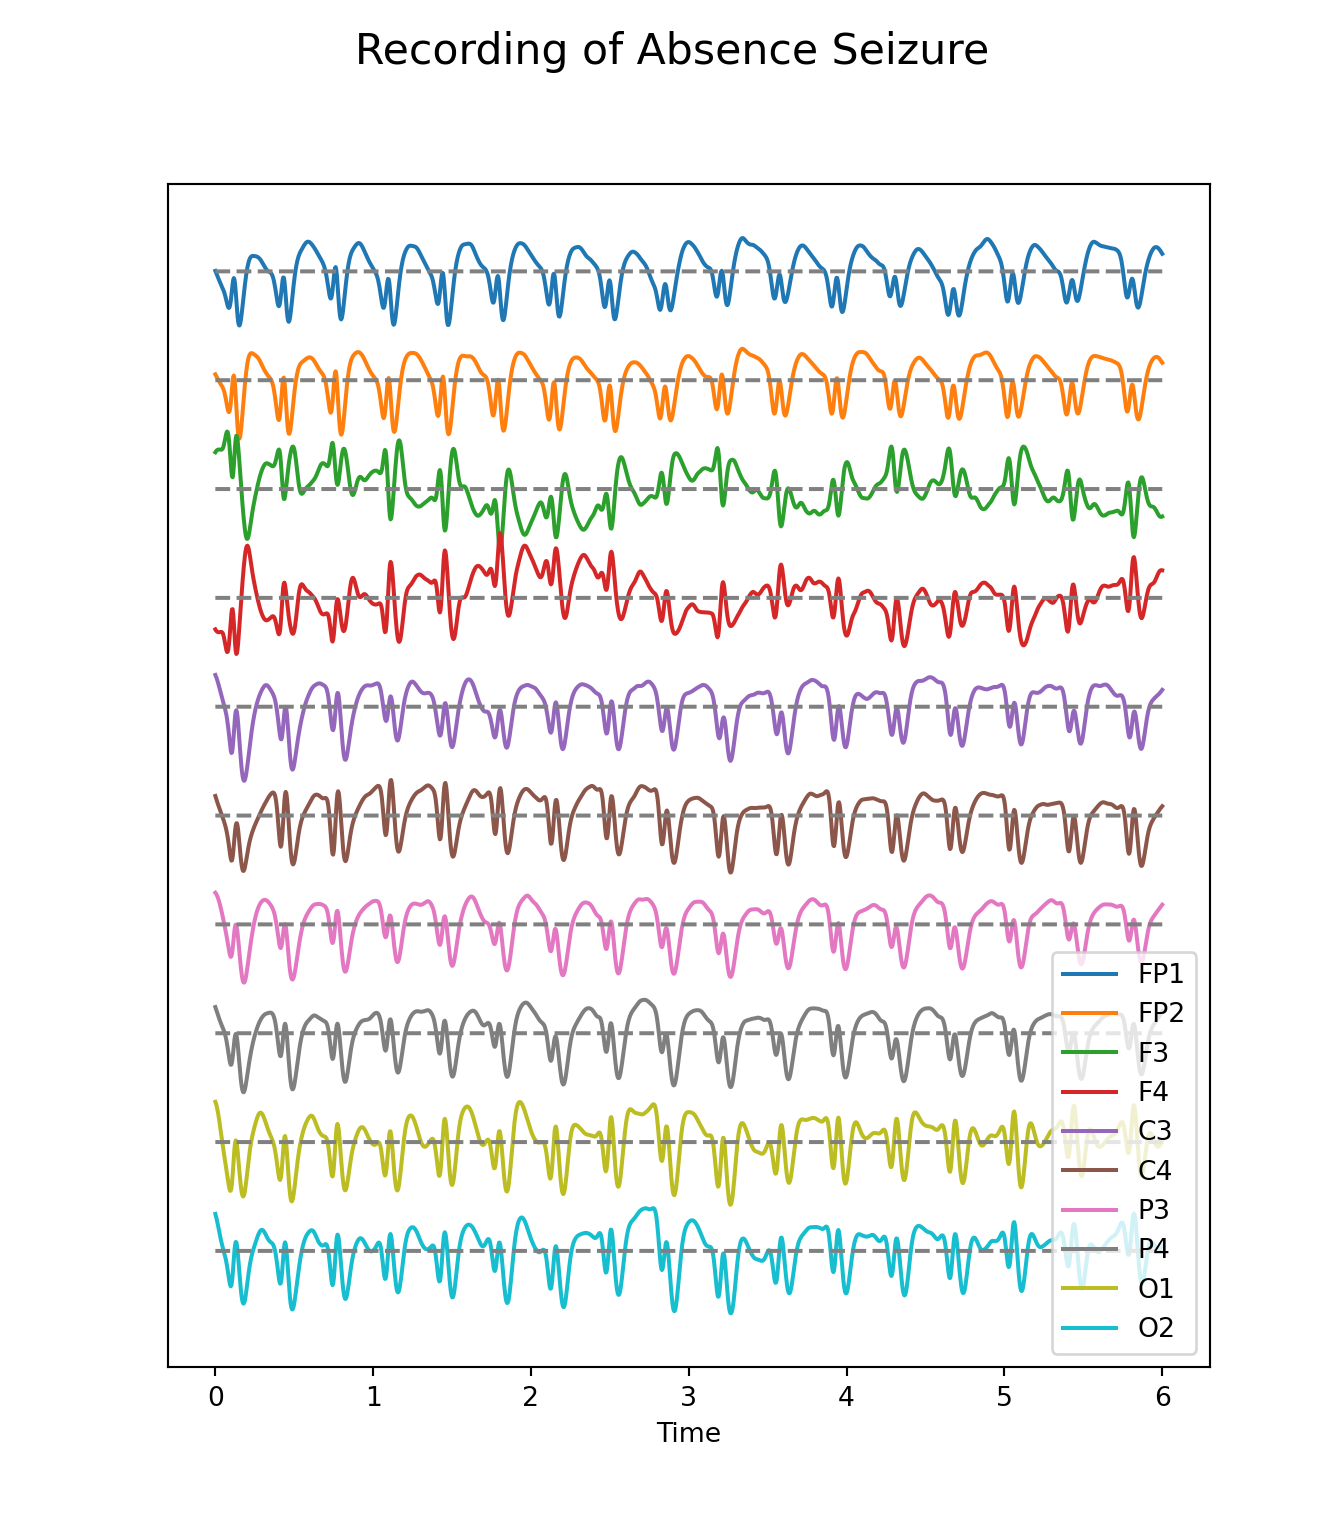

The variable(s) given to a function, and those produced by it, are
referred to as input arguments, and outputs respectively. A function
ordinarily accepts data or variables in the form of one or several such
input arguments, processes these, and subsequently produces a specific
output.

There are different ways to create functions in Python. In this course,
we will be using the keyword `def` to define our own functions. This is
the easiest, and by far the most common method for defining functions.
The structure of a typical function defined using `def` can be see in
the `plot_series` example:

There are several key points about functions that are worth noting:

-   The name of a function follows same principles as that of any other
    variable. It must be in lower-case characters, and it is strongly
    suggested that its name bears resemblance to the processes it
    undertakes.

-   The input arguments of a function, e.g. *data* and *sr* in our
    example, are essentially variables whose scope is confined only to
    the function. That is, they are only accessible within the function
    itself, and not from outside the function.

-   Variables defined inside of a function, should not use the same name
    as variables defined outside. Otherwise they may override each
    other.

When defining a function, it is important and best practice to write
that function to perform only one specific task. As such, it can be used
independent of the current context. Try to avoid incorporating separable
tasks into a single function.

Once you start creating functions for different purposes you can start
to build your own library of ready-to-use functions. This is the primary
principle of a popular programming paradigm known as [functional
programming](https://en.wikipedia.org/wiki/Functional_programming).

### **Filtering**

Datasets with complex waveforms contain many different components which
may or may not be relevant to a specific question.

In such situations it can be useful to filter your data, ensuring that
you are removing specific components from the dataset that are not
relevant to your analyses or question. In this context, the term
component refers to ‘frequency’, i.e. the number of cycles the waveform
completes per unit of time. A small number refers to low frequencies
with long periods (cycles), and a large number refers to high
frequencies with short periods.

Let’s explore a simple example, demonstrating how both low- and
high-frequency components can be filtered (suppressed) in our example
time series.

Let’s begin by defining a simple function which takes two additional
input arguments: low and high cut-off.

``` python
def data_filter(data, sr, low, high):
    """
    Filtering of multiple time series.

    data: nxm numpy array. Rows are time points, columns are recordings
    sr: sampling rate, same time units as period

    low:  Low cut-off frequency (high-pass filter)
    high: High cut-off frequency (low-pass filter)

    return: filtered data
    """

    from scipy.signal import butter, sosfilt

    order = 5

    filter_settings = [low, high, order]

    sos = butter(order, (low,high), btype='bandpass', fs=sr, output='sos')

    data_filtered = zeros((data.shape[0], data.shape[1]))

    for index, column in enumerate(data.transpose()):
        forward = sosfilt(sos, column)
        backwards = sosfilt(sos, forward[-1::-1])
        data_filtered[:, index] = backwards[-1::-1]

    return data_filtered
```

``` python
data_back_filt = data_filter(data_back, sr, 8, 13)

(fig, ax) = plot_series(data_back_filt, sr)

fig.suptitle('Filtered Recording of Background EEG', fontsize=16);

legend(names);

show()
```

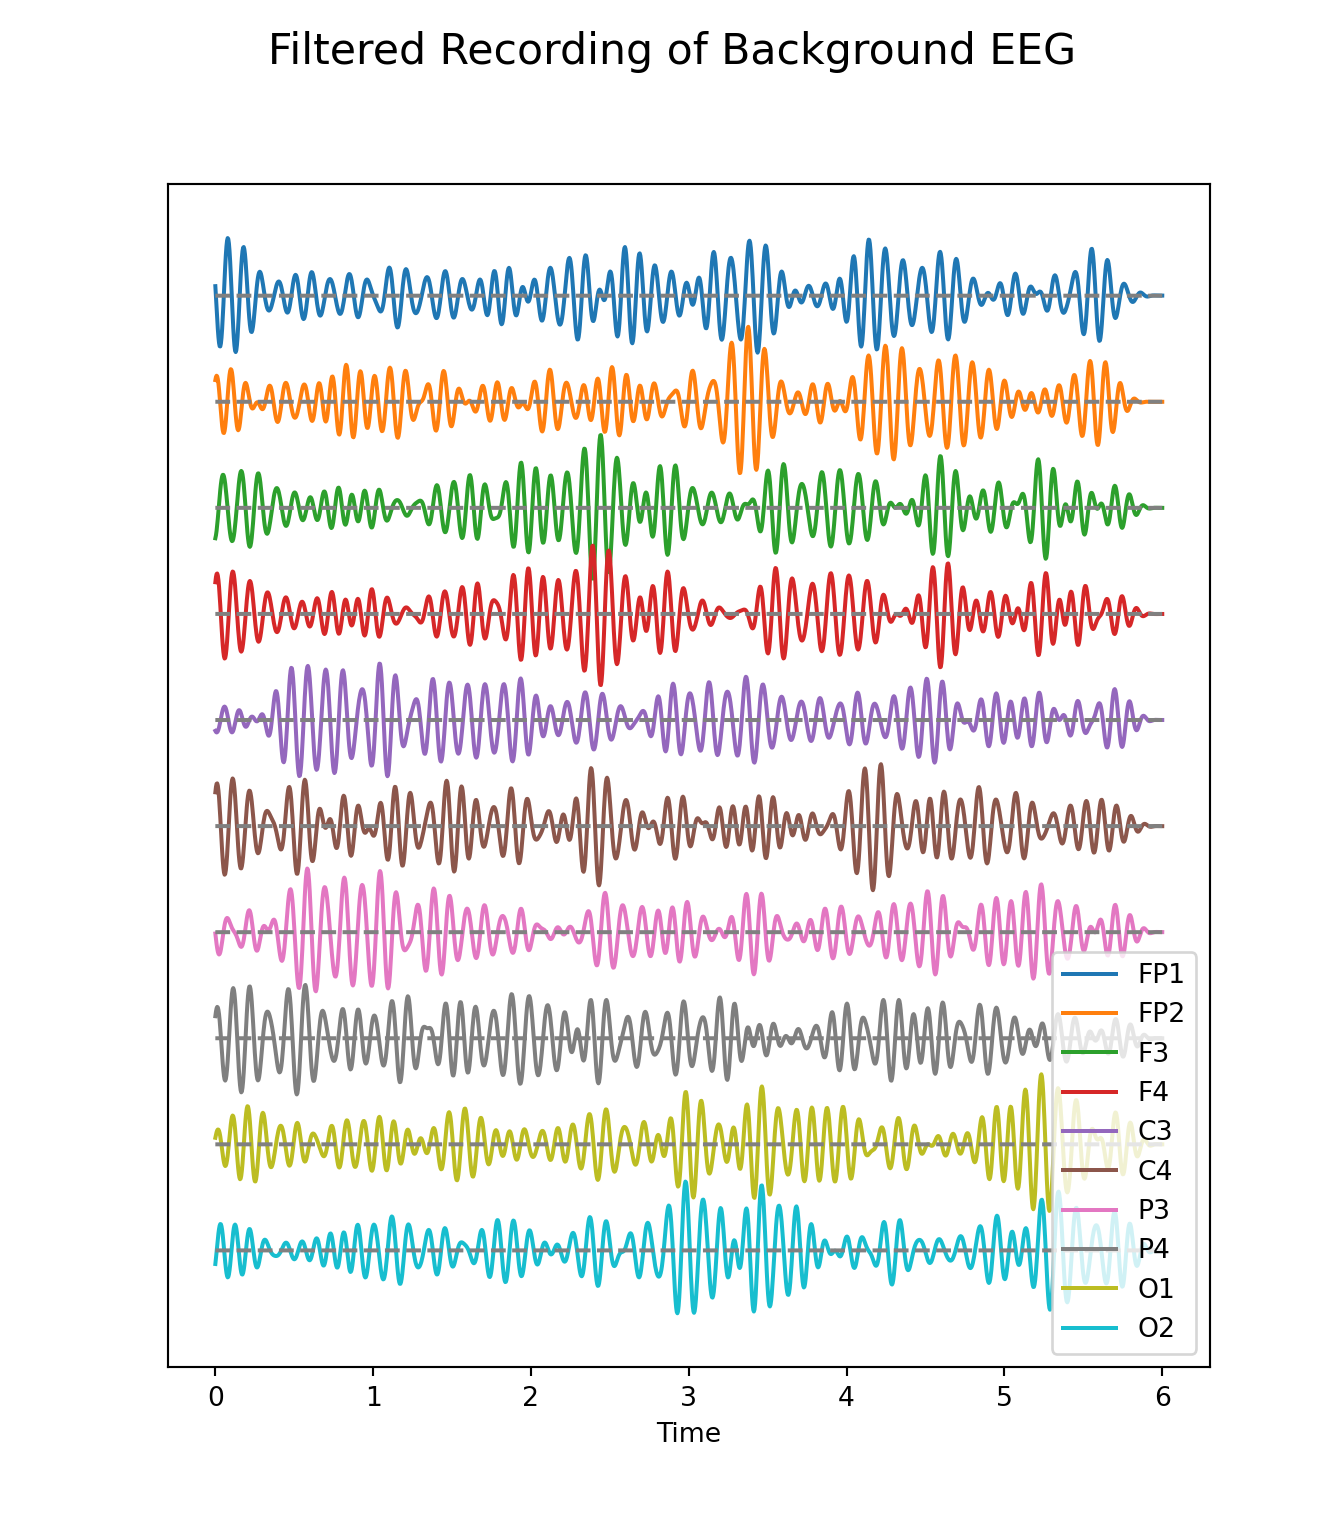

The frequency range from 8 to 13 Hz is referred to as alpha band in our
EEG. It is thought that this represents a type of idling rhythm in the
brain where the brain is not actively processing sensory input.

## Practice Exercise 1

**Band-pass filtered data**

Create figures of the delta (1-4 Hz) band for both the background and
the seizure EEG. Note the differences.

``` python
data_back_filt = data_filter(data_back, sr, 1, 4)

(fig, ax) = plot_series(data_back_filt, sr)

fig.suptitle('Delta Band of Background EEG', fontsize=16);

legend(names);

show()
```

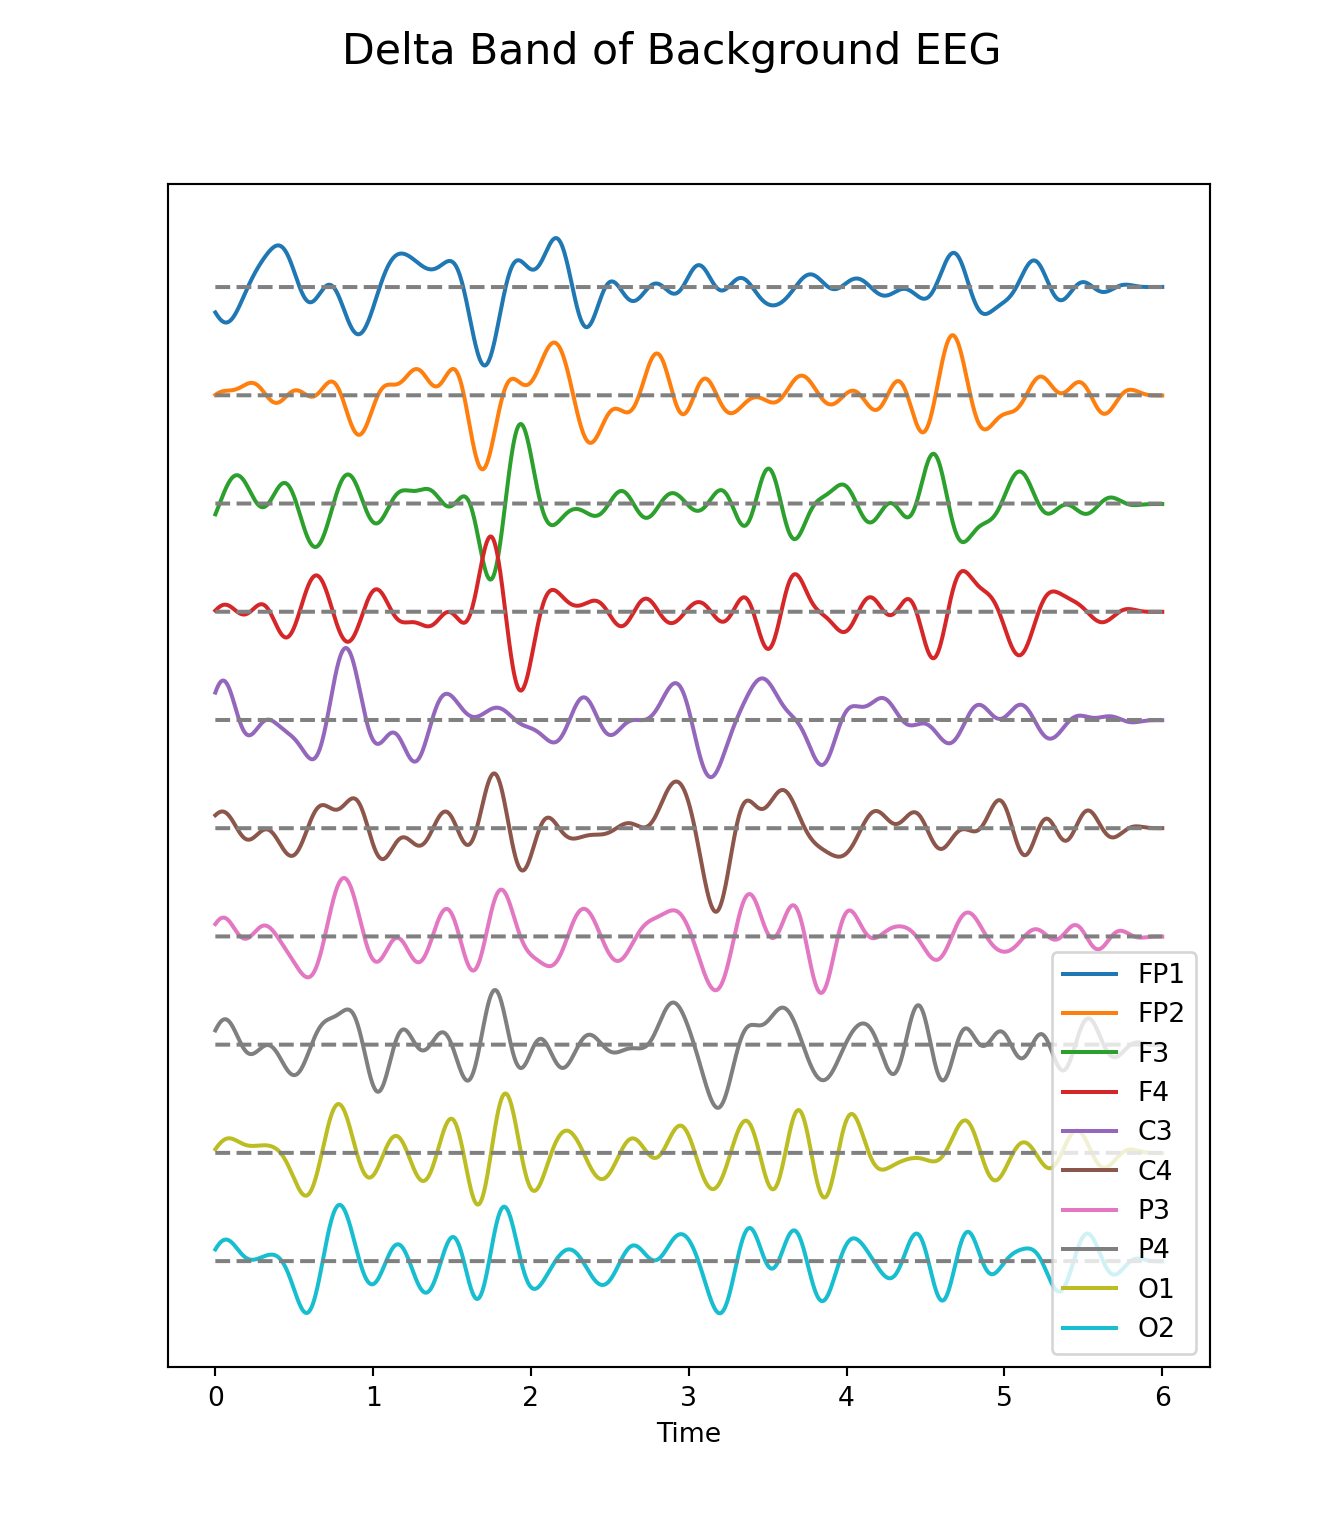

``` python
data_epil_filt = data_filter(data_epil, sr, 1, 4)

(fig, ax) = plot_series(data_epil_filt, sr)

fig.suptitle('Delta Band of Seizure EEG', fontsize=16);

legend(names);

show()
```

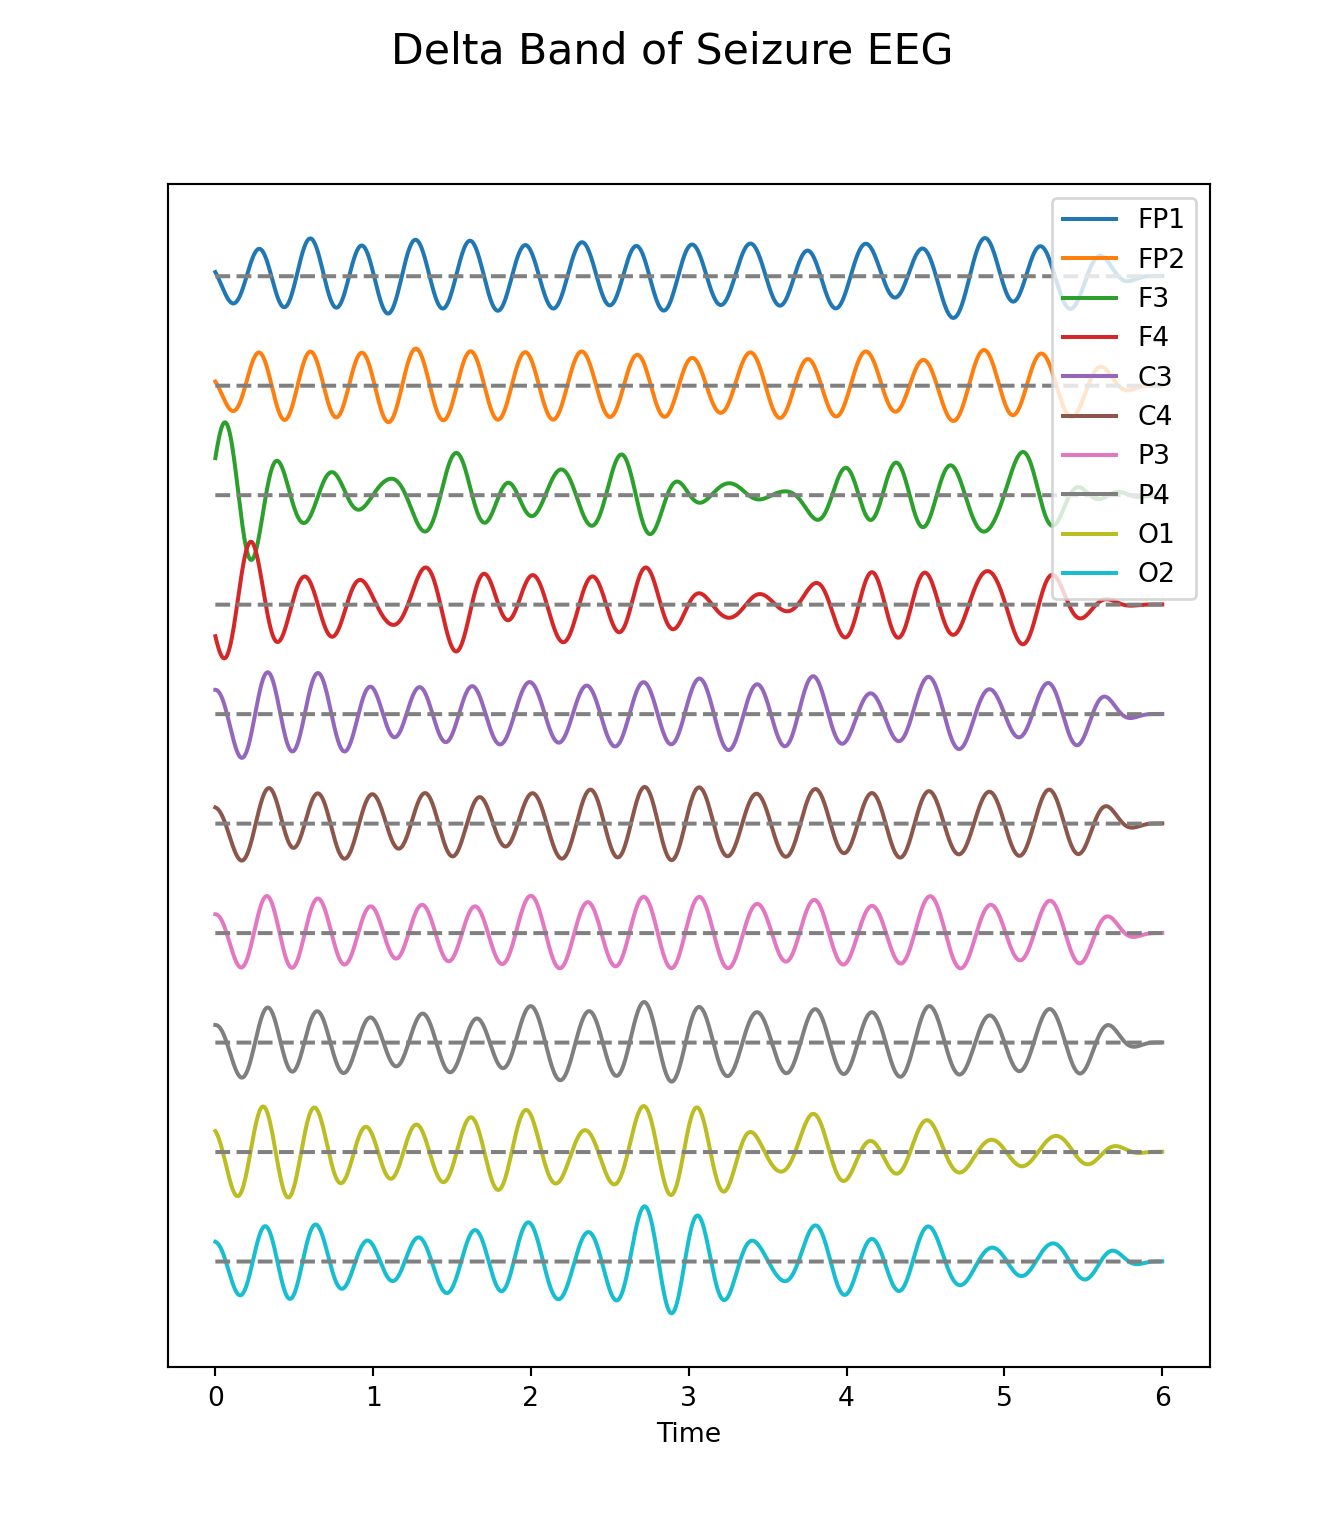

### **Fourier Spectrum**

The Fourier spectrum decomposes the time series into a sum of sine
waves. The spectrum gives the coefficients of each of the sine wave
components. The coefficients are directly related to the amplitudes
required to optimally fit the sum of all sine waves, in order to
recreate the original data.

However, the assumption behind the Fourier Transform, is that the data
are provided as an infinitely long, stationary time series. These
assumptions are invalid, as the data are finite and stationarity of a
biological system is rarely guaranteed. Thus, interpretation needs to be
approached cautiously.

#### **Fourier Transform of EEG data**

We import the Fourier Transform function `fft` from the library
**scipy.fftpack** where it can be used to transform all columns at the
same time.

``` python
from scipy.fftpack import fft

data_back_fft = fft(data_back, axis=0)
```

To plot the results of the Fourier Transform, the following steps must
be taken.

Firstly, we must obtain a Fourier spectrum for every data column. Thus,
we need to define how many plots we want to have. If we take only the
columns in our data, we should be able to display them all,
simultaneously.

Secondly, the Fourier Transform results in twice the number of complex
coefficients; it produces both positive and negative frequency
components, of which we only need the first (positive) half.

Lastly, the Fourier Transform outputs complex numbers. To display the
‘amplitude’ of each frequency, we take the absolute value of the complex
numbers, using the abs() function.

``` python
no_win = 2

rows = data_back.shape[0]

freqs = (sr/2)*linspace(0, 1, int(rows/2))

amplitudes_back = (2.0 / rows) * abs(data_back_fft[:rows//2, :2])


fig, axes = subplots(figsize=(6, 5), ncols=1, nrows=no_win, sharex=False)

names = df_back.columns[:2]

for index, ax in enumerate(axes.flat):
    axes[index].plot(freqs, amplitudes_back[:, index])
    axes[index].set_xlim(0, 8)
    axes[index].set(ylabel=f'Amplitude {names[index]}')

axes[index].set(xlabel='Frequency (Hz)');

show()
```

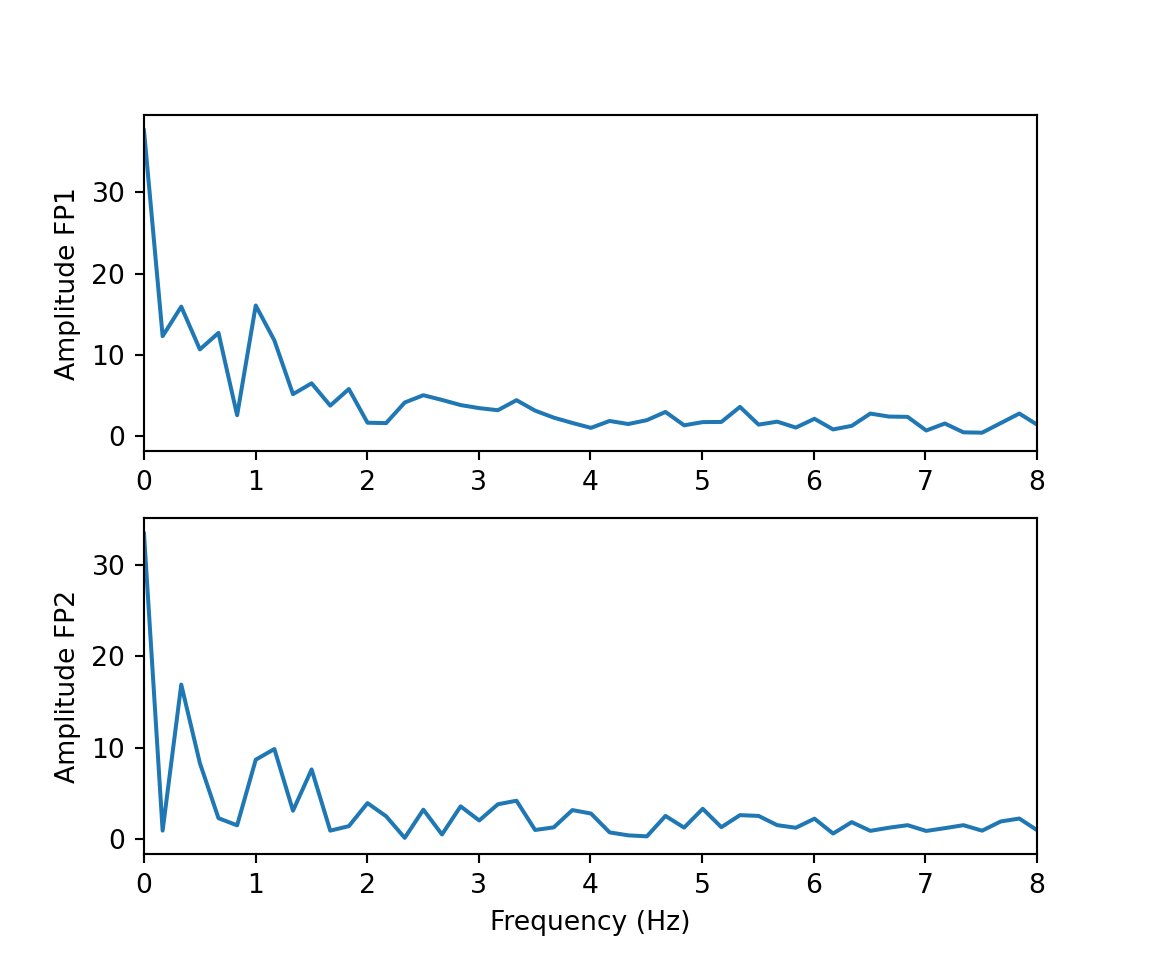

In these two channels, we can clearly see that the main amplitude
contributions lie in the low frequencies, below 2 Hz.

Let us compare the corresponding figure for the case of seizure
activity:

``` python
data_epil_fft = fft(data_epil, axis=0)
```

``` python
fig, axes = subplots(figsize=(6, 5), ncols=1, nrows=no_win, sharex=False)

names = df_epil.columns[:2]

amplitudes_epil = (2.0 / rows) * abs(data_epil_fft[:rows//2, :2])

for index, ax in enumerate(axes.flat):
    axes[index].plot(freqs, amplitudes_epil[:, index])
    axes[index].set_xlim(0, 12)
    axes[index].set(ylabel=f'Amplitude {names[index]}')

axes[index].set(xlabel='Frequency (Hz)');

show()
```

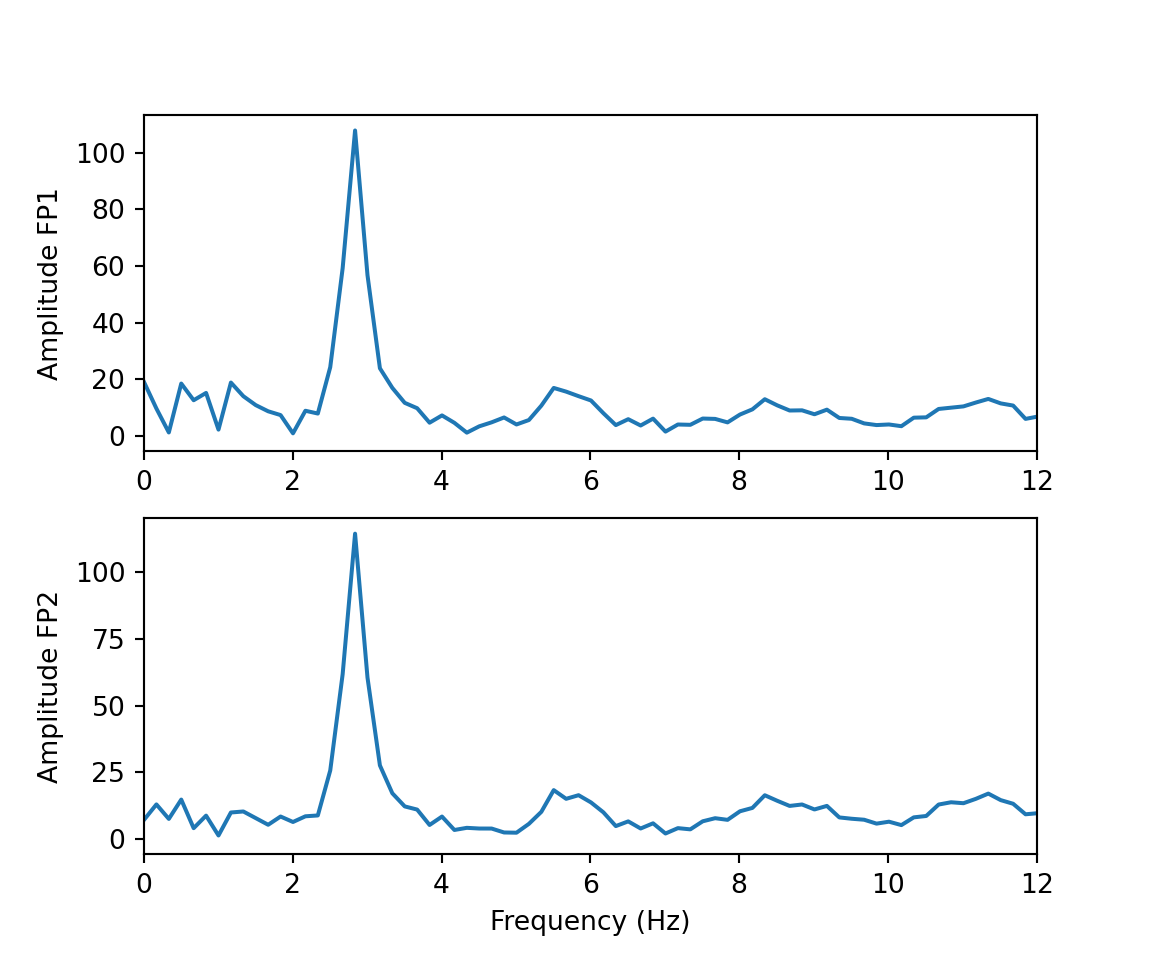

During the seizure, it is clear that the main frequency of the epileptic
rhythm is between 2 and 3 Hz.

As we can see from the Fourier spectra generated above, the amplitudes
are high for low frequencies, and tend to decrease as the frequency
increases. Thus, it can sometimes be useful to see the high frequencies
enhanced. This can be achieved with a logarithmic plot of the powers.

``` python
fig, axes = subplots(figsize=(6, 6), ncols=1, nrows=no_win, sharex=False)

for index, ax in enumerate(axes.flat):

    axes[index].plot(freqs, amplitudes_back[:, index])
    axes[index].set_xlim(0, 30)
    axes[index].set(ylabel=f'Amplitude {names[index]}')
    axes[index].set_yscale('log')

axes[no_win-1].set(xlabel='Frequency (Hz)');
fig.suptitle('Logarithmic Fourier Spectra of Background EEG', fontsize=16);

show()
```

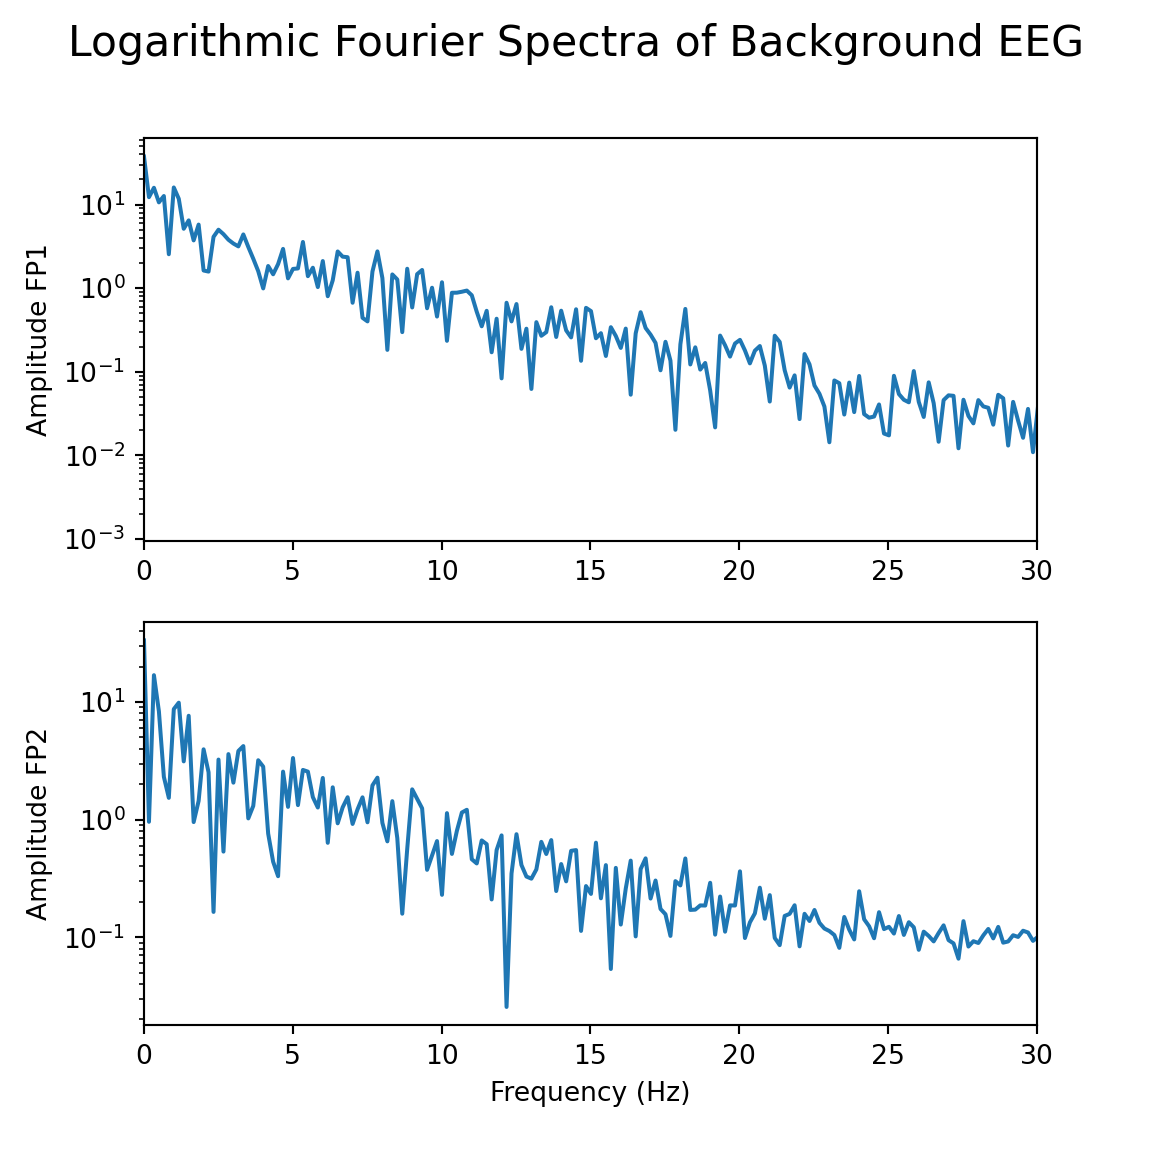

And for the seizure data:

``` python
fig, axes = subplots(figsize=(6, 10), ncols=1, nrows=no_win, sharex=False)

for index, ax in enumerate(axes.flat):

    axes[index].plot(freqs, amplitudes_epil[:, index])
    axes[index].set_xlim(0, 30)
    axes[index].set(ylabel=f'Power {names[index]}')
    axes[index].set_yscale('log')

axes[no_win-1].set(xlabel='Frequency (Hz)');
fig.suptitle('Logarithmic Fourier Spectra of Seizure EEG', fontsize=16);

show()
```

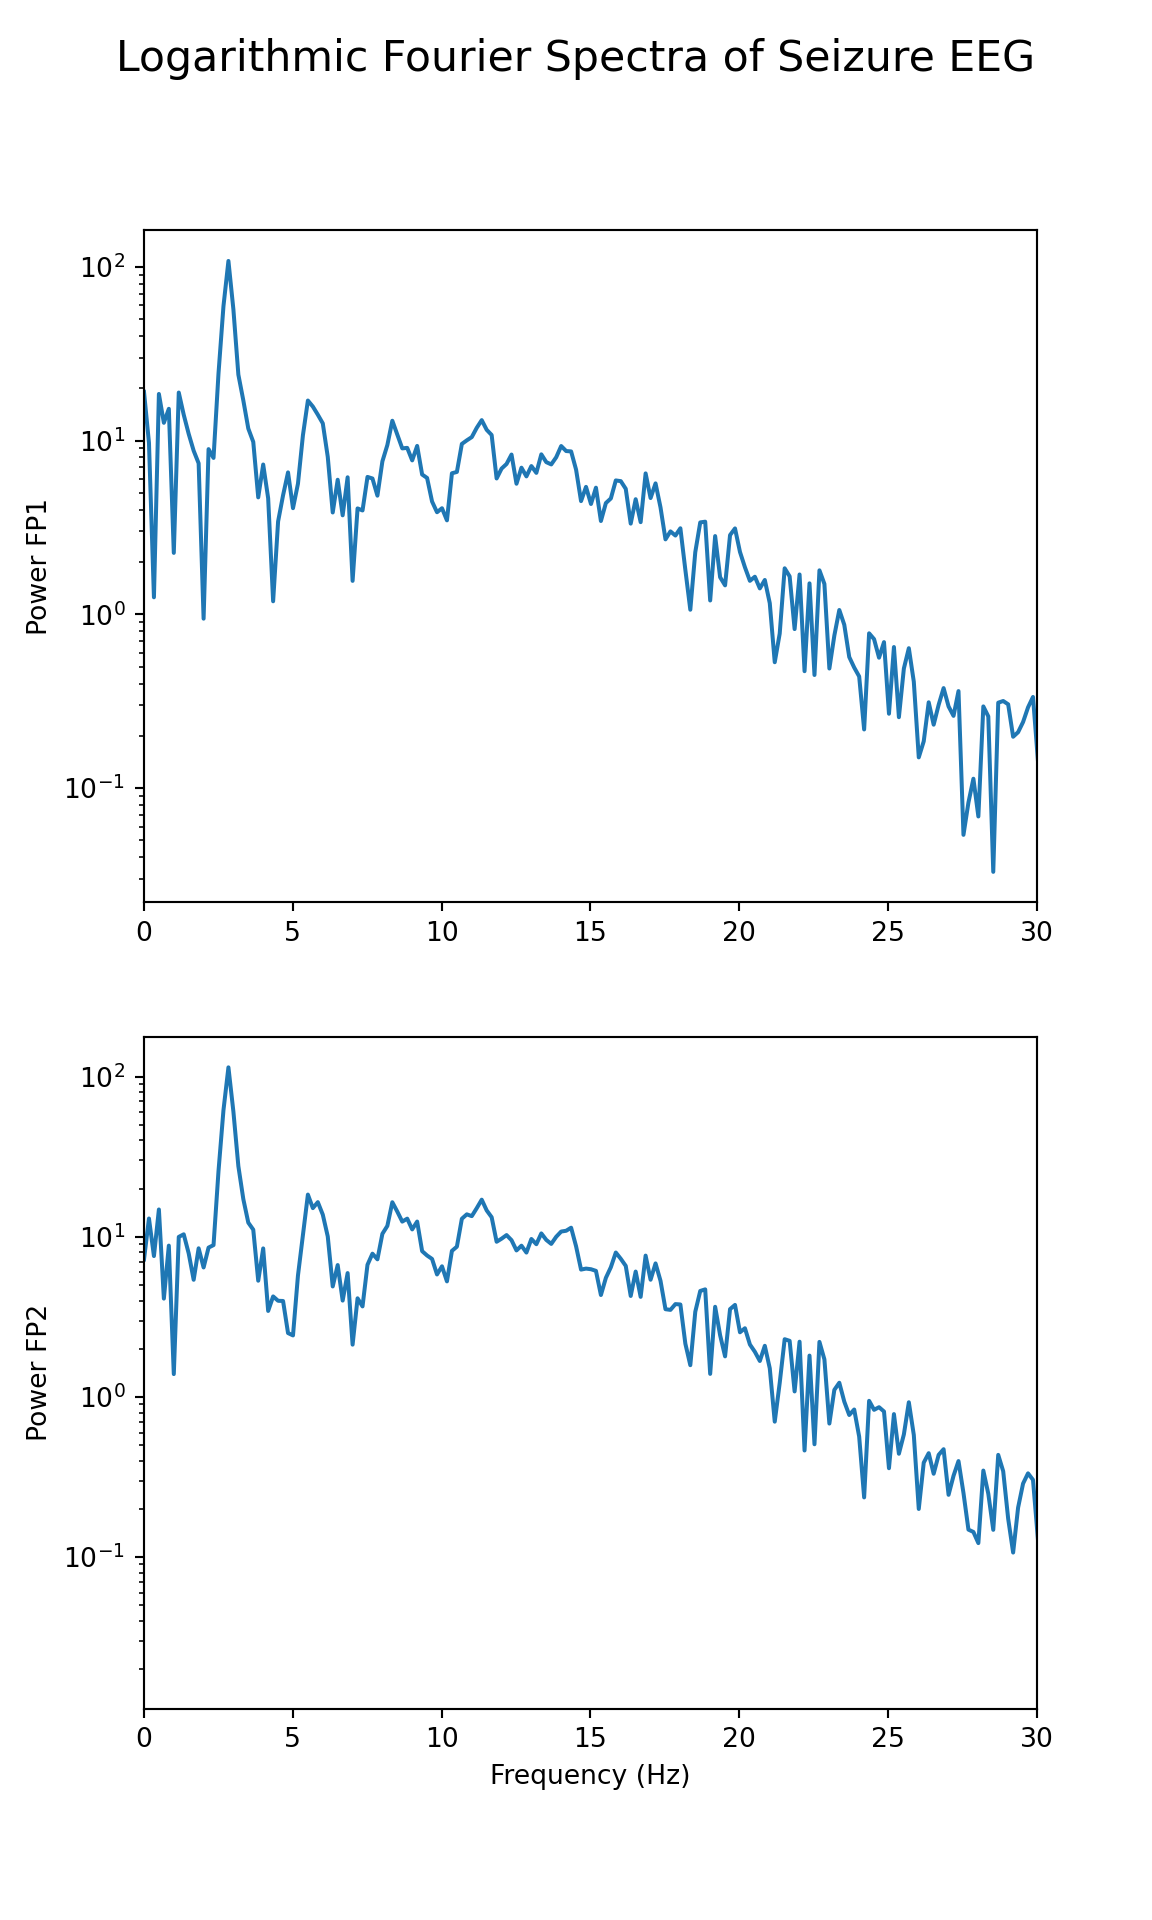

In the spectrum of the absence data, it is now more obvious that there
are further maxima at 6, 9, 12 and perhaps 15Hz. These are integer
multiples or ‘harmonics’ of the basic frequency at around 3Hz, which we
term as the fundamental frequency.

A feature that can be used as a summary statistic, is to caclulate the
**band power** for each channel. Band power is the total power of a
signal within a specific frequency range. The band power can be obtained
by calculating the sum of all powers within a specified range of
frequencies; this range is also referred to as the ‘band’. The band
power, thus, is given as a single number.

## Practice Exercise 2

**Fourier spectra of filtered data**

Calculate and display the Fourier spectra of the first two channels
filtered between 4 and 12 Hz for the absence seizure data. Can you find
any harmonics?

``` python
data_epil_filt = data_filter(data_epil, sr, 4, 12)

data_epil_fft = fft(data_epil_filt, axis=0)

rows = data_epil.shape[0]

freqs = (sr/2)*linspace(0, 1, int(rows/2))

amplitudes_epil = (2.0 / rows) * abs(data_epil_fft[:rows//2, :no_win])

fig, axes = subplots(figsize=(6, 10), ncols=1, nrows=no_win, sharex=False)

for index, ax in enumerate(axes.flat):
    axes[index].plot(freqs, amplitudes_epil[:, index])
    axes[index].set_xlim(0, 12)
    axes[index].set(ylabel=f'Amplitudes {names[index]}')
axes[no_win-1].set(xlabel='Frequency (Hz)');

fig.suptitle('Fourier Spectra of Seizure EEG', fontsize=16);

show()
```

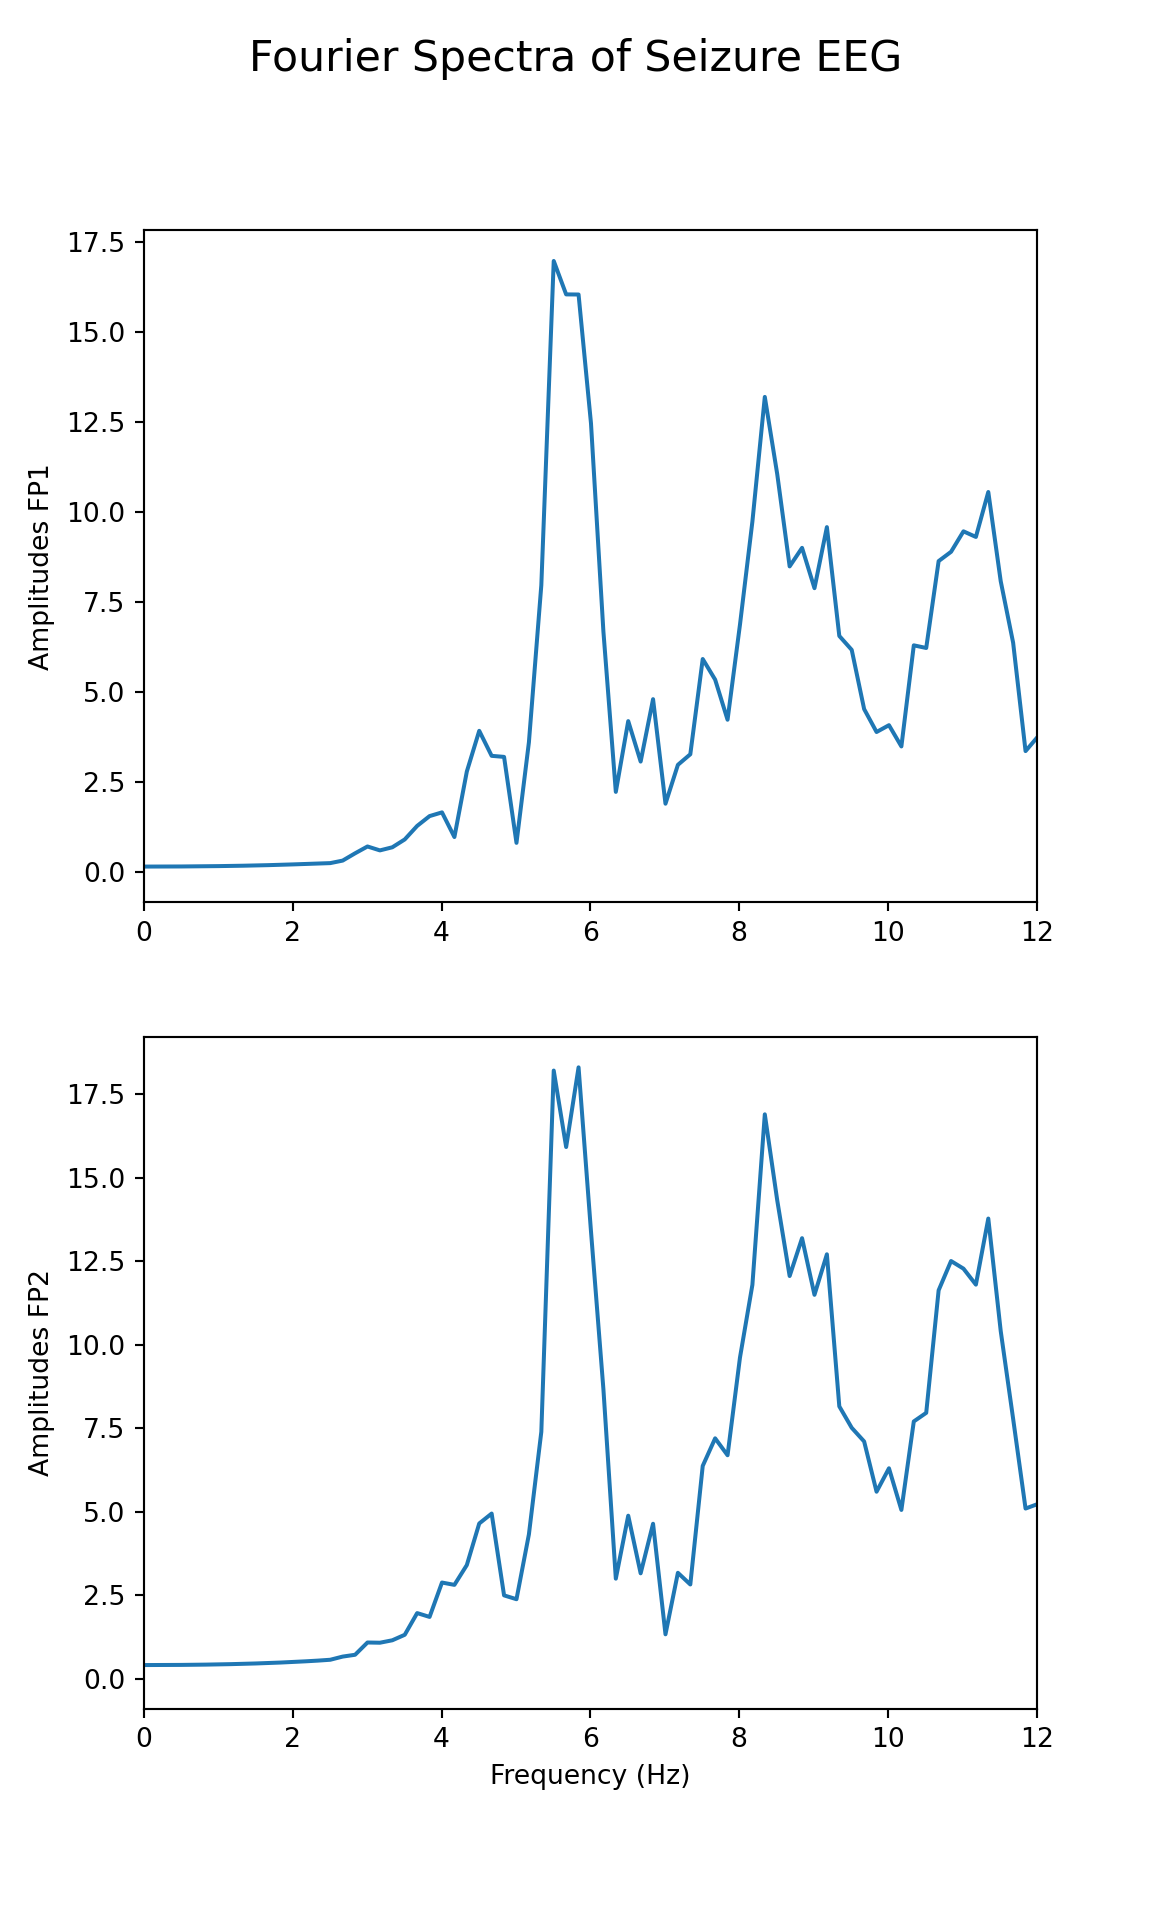

### **Cross-Correlation Matrix**

As one example of a multivariate analysis of time series data, we can
also calculate the cross-correlation matrix.

Let us calculate it for the background:

``` python
corr_matrix_back = corrcoef(data_back, rowvar=False)

fill_diagonal(corr_matrix_back, 0)

fig, ax = subplots(figsize = (8,8))

im = ax.imshow(corr_matrix_back, cmap='coolwarm');

fig.colorbar(im, orientation='horizontal', shrink=0.68);

show()
```

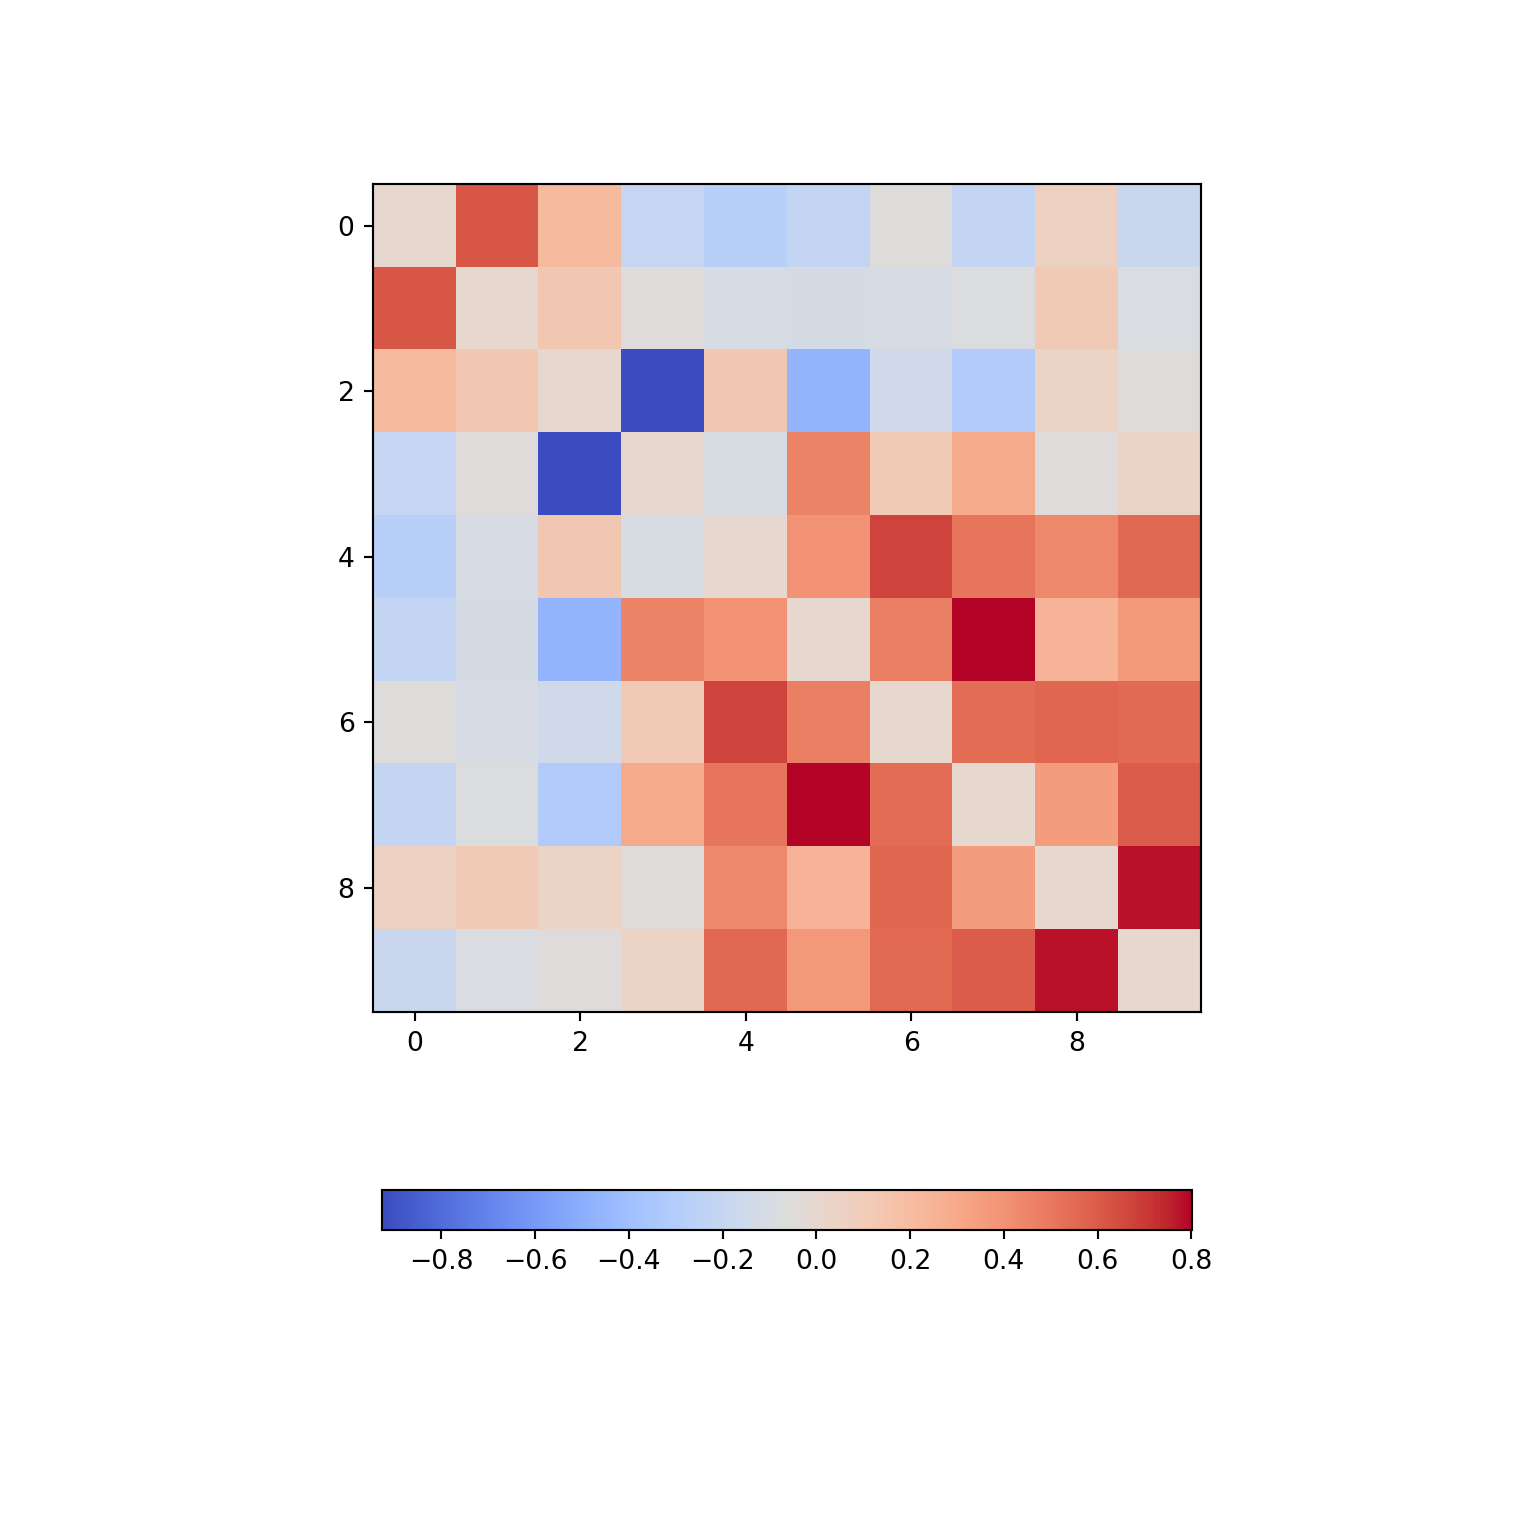

The diagonal is set to zero. This is done to improve the visual display.
If it was left set to one, the diagonal would dominate the visual
impression given, even though it is trivial and uninformative.

Looking at the non-diagonal elements, we find:

-   Two strongly correlated series (indices 5 and 7)

-   Two strongly anti-correlated series (indices 3 and 4)

-   A block of pronounced correlations (between series with indices 4
    through 9)

## Practice Exercise 3:

**Display the correlation matrix for the seizure data**

Calculate the correlation matrix for the seizure data and compare the
correlation pattern to the one from the background data.

``` python
corr_matrix_epil = corrcoef(data_epil, rowvar=False)

fill_diagonal(corr_matrix_epil, 0)

fig, ax = subplots(figsize = (8,8))

im = ax.imshow(corr_matrix_epil, cmap='coolwarm');

fig.colorbar(im, orientation='horizontal', shrink=0.68);

show()
```

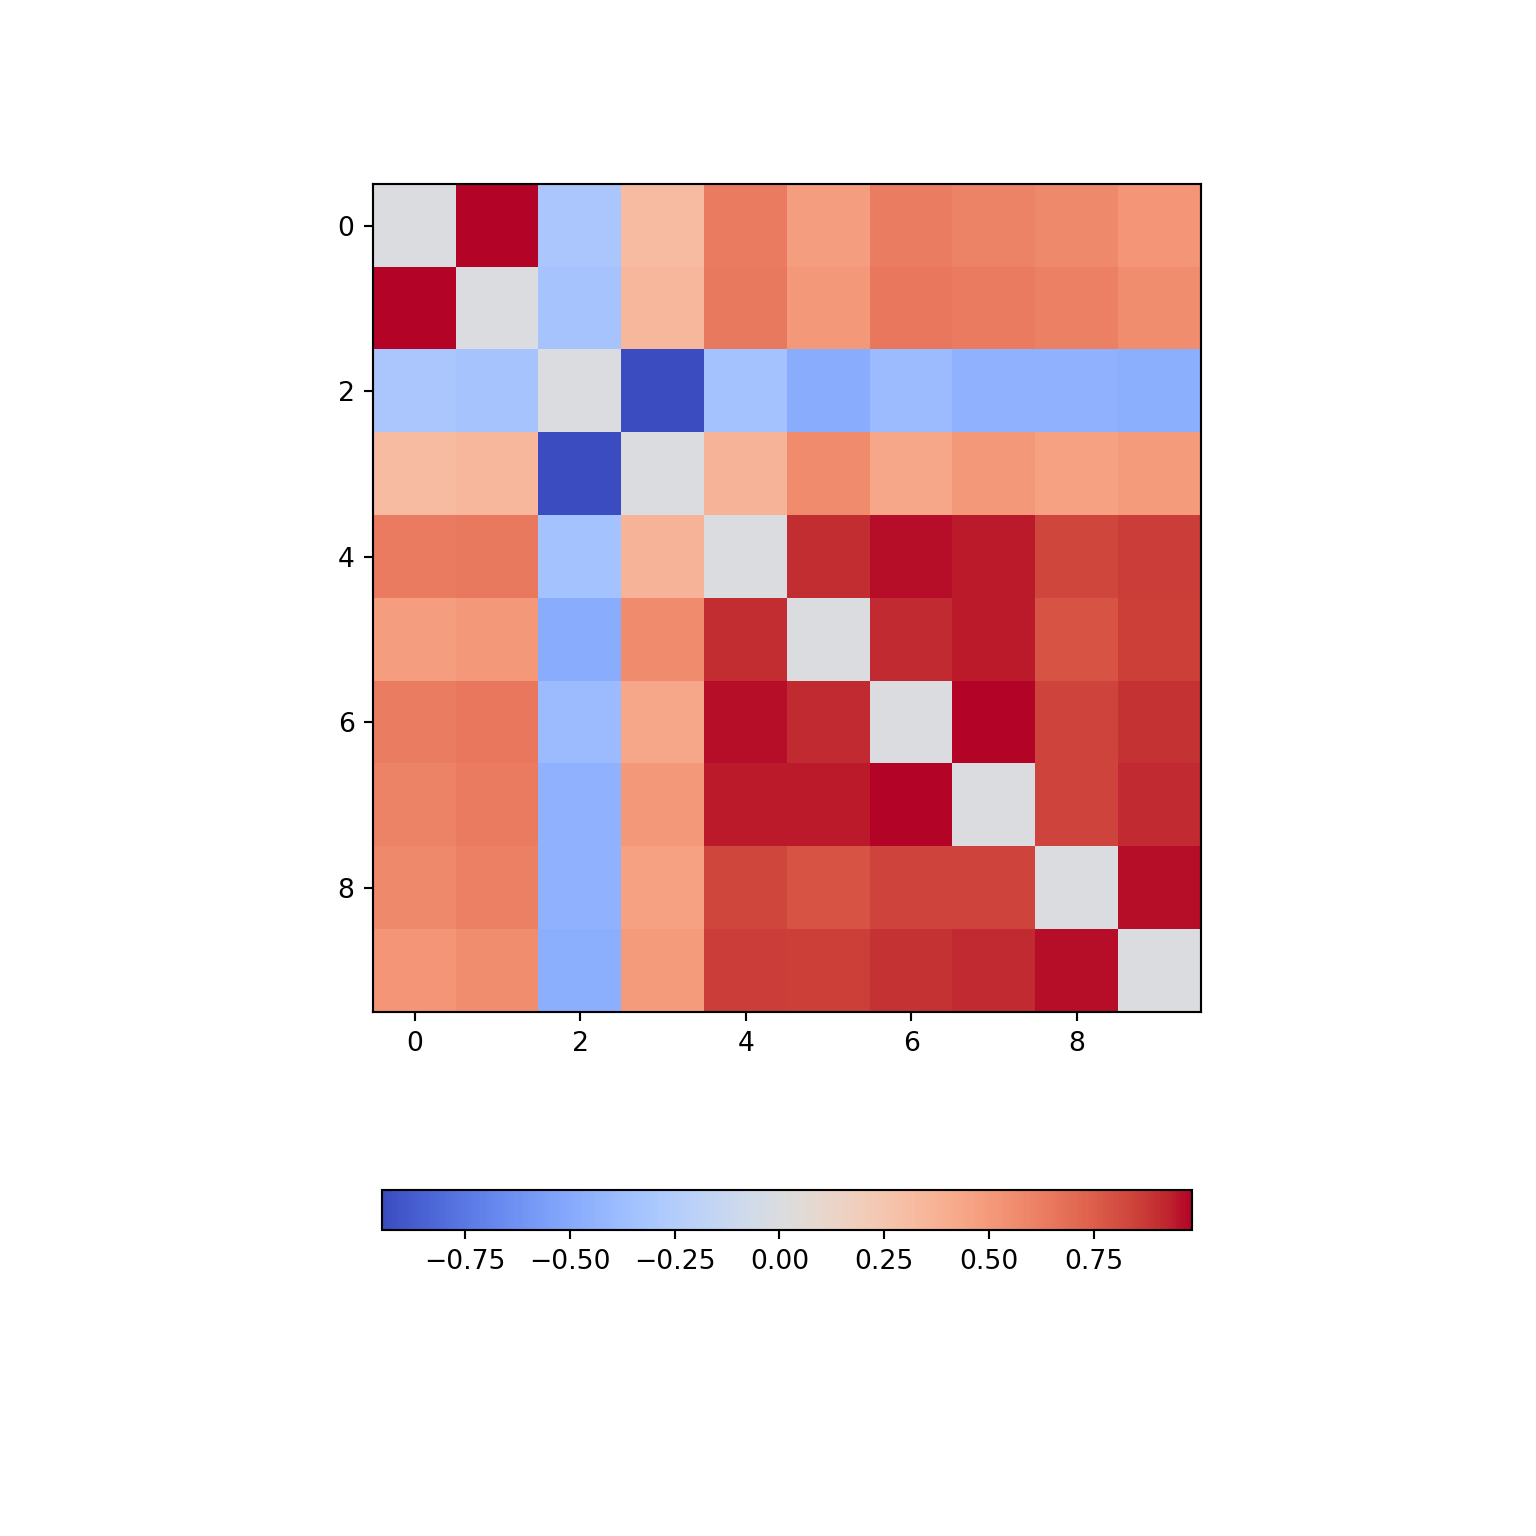

We find - a number of pairs of strongly correlated series - two strongly
anti-correlated series (in- dices 3 and 4) - a block of pronounced
correlations between series with indices 4 through 9).

So interestingly, while the time series changes dramatically in shape,
the correlation pattern still shows some qualitative resemblance.

All results shown so far, represent the recording of the segment of 6
seconds we chose at the beginning of the lesson. The human brain
produces time-dependent voltage changes 24 hours a day. Thus seeing only
a few seconds provides only a partial view. The next step is therefore
to investigate and demonstrate how the features found for one segment
may vary over time.

## Exercises

#### End of chapter Exercises

**Pathological Human Brain Rhythms**

Look at the image of brain activity from a child at the start of an
epileptic seizure. It shows 4 seconds of evolution of the first 10
channels of a seizure rhythm at sampling rate sr=1024.

``` python
path = 'data/P1_Seizure1.csv'

data = read_csv(path, delimiter=r"\s+")

data_P1 = data.to_numpy()

sr = 1024

period = 4

channels = 10

plot_series(data_P1[:sr*period, :channels], sr);

show()
```

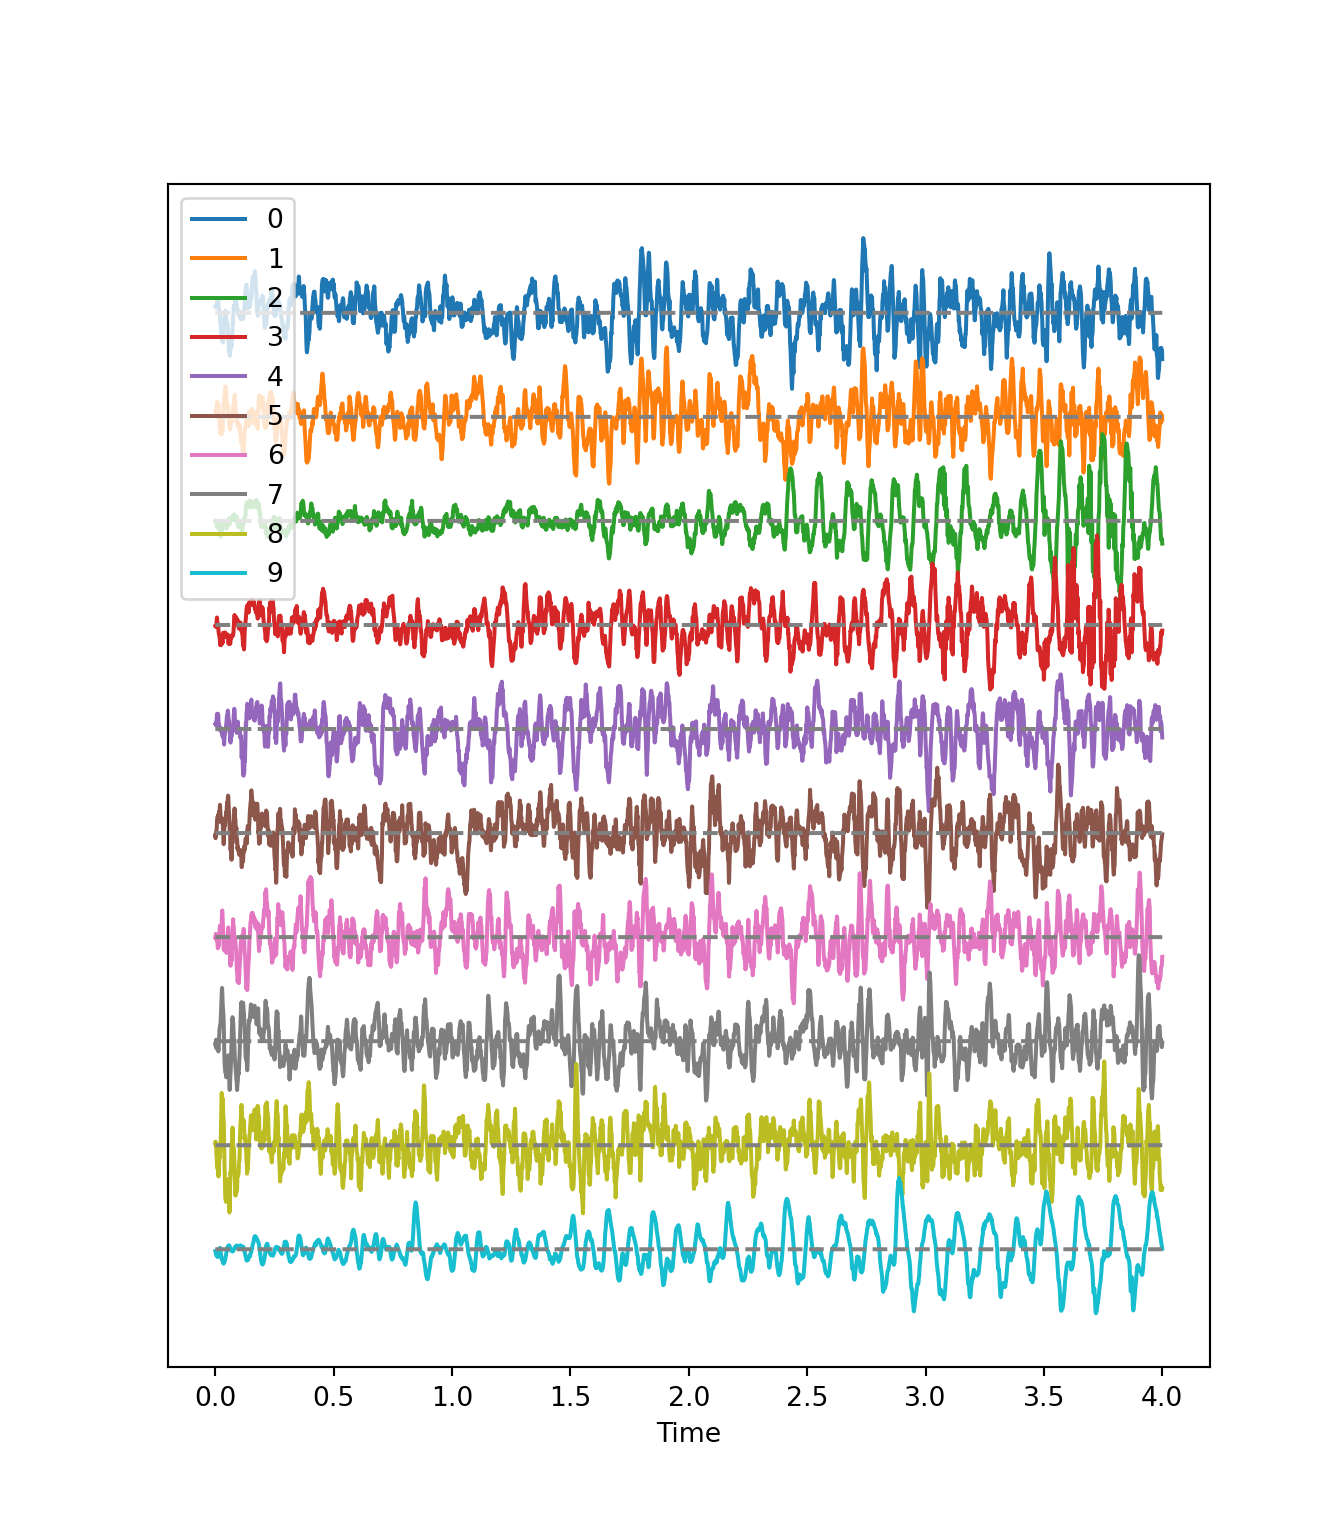

Using the code utilised in this lesson, import the data from the file
`P1_Seizure1.csv` and generate an overview of uni- and multivariate
features in the following form:

1.  Pick the first two seconds of the recording as background, and the
    last two seconds as epileptic seizure rhythm. Use the first ten
    channels of data, in both cases. Using the shape attribute, the data
    should give a tuple of (2048, 10).

2.  Filter the data to get rid of frequencies below 1 Hz and frequencies
    faster than 20 Hz.

3.  Plot time series for both.

4.  Fourier Transform both filtered datasets and display the Fourier
    spectra of the first 4 channels. What are the strongest frequencies
    in each of the two datasets?

5.  Plot the correlation matrices of both datasets. Which channels show
    the strongest change in correlations?

## Solutions are provided after assignments are marked.

-   `plot_series` is a Python function we defined to display multiple
    time series plots.
-   Data filtering is applied to remove specific and irrelevant
    components.
-   The Fourier spectrum decomposes the time series into a sum of sine
    waves.
-   Cross-correlation matrices are used for multivariate analysis.

LS0tCnRpdGxlOiAiVGltZSBTZXJpZXMiCnRlYWNoaW5nOiA2MApleGVyY2lzZXM6IDYwCi0tLQoKClsqKkRvd25sb2FkIGNoYXB0ZXIgUERGICgucGRmKS4qKl0oaHR0cHM6Ly9kcml2ZS51c2VyY29udGVudC5nb29nbGUuY29tL3UvMS91Yz9pZD0xdUdOcllrM0JaZHo1TVRYSjZyay0wbFNwaGVvQk14N0ImZXhwb3J0PWRvd25sb2FkKQoKWyoqRG93bmxvYWQgY2hhcHRlciBub3RlYm9vayAoLmlweW5iKS4qKl0oaHR0cHM6Ly9kcml2ZS51c2VyY29udGVudC5nb29nbGUuY29tL3UvMS91Yz9pZD0xdW5FWm1QZmIwZW9sdWlSTjBpdDR3VkRjbmdGa1hteE8mZXhwb3J0PWRvd25sb2FkKQoKWzxzcGFuIHN0eWxlPSJjb2xvcjogcmdiKDI1NSwgMCwgMCk7Ij4qKk1hbmRhdG9yeSBMZXNzb24gRmVlZGJhY2sgU3VydmV5Kio8L3NwYW4+XShodHRwczovL2RvY3MuZ29vZ2xlLmNvbS9mb3Jtcy9kL2UvMUZBSXBRTFNkcjBjYXBGN2psb0poUEgzUGtpMUIzTFpvS09HMTZwb09wdVZKN1NMMkxrd0xIUUEvdmlld2Zvcm0/cGxpPTEpCgpgYGB7ciBzZXR1cCwgaW5jbHVkZT1GQUxTRX0KbGlicmFyeShyZXRpY3VsYXRlKQoKIyBVbnNldCBhbnkgcHJldmlvdXNseSBzZXQgUHl0aG9uIGVudmlyb25tZW50cyB0byBhdm9pZCBjb25mbGljdHMKU3lzLnVuc2V0ZW52KCJSRVRJQ1VMQVRFX1BZVEhPTiIpCgojIENoZWNrIGlmIFBhbmRvYyBpcyBhdmFpbGFibGUKaWYgKCFmaWxlLmV4aXN0cygiL29wdC9ob21lYnJldy9iaW4vcGFuZG9jIikpIHsKICBzdG9wKCJQYW5kb2MgaXMgbm90IGZvdW5kLiBQbGVhc2UgaW5zdGFsbCBQYW5kb2Mgb3IgdXBkYXRlIHRoZSBwYXRoLiIpCn0KCiMgRHluYW1pY2FsbHkgc2V0IHRoZSBQeXRob24gZW52aXJvbm1lbnQKdHJ5Q2F0Y2goewogIHVzZV92aXJ0dWFsZW52KCIvVXNlcnMvQWRhbS8udmlydHVhbGVudnMvci1yZXRpY3VsYXRlIiwgcmVxdWlyZWQgPSBUUlVFKQogIGNhdCgiUHl0aG9uIGVudmlyb25tZW50IHNldCBzdWNjZXNzZnVsbHkuXG4iKQp9LCBlcnJvciA9IGZ1bmN0aW9uKGUpIHsKICBjYXQoIkVycm9yIHNldHRpbmcgUHl0aG9uIGVudmlyb25tZW50OiIsIGUkbWVzc2FnZSwgIlxuIikKICBzdG9wKCJGYWlsZWQgdG8gc2V0IFB5dGhvbiBlbnZpcm9ubWVudC4iKQp9KQoKIyBWYWxpZGF0ZSBQeXRob24gZW52aXJvbm1lbnQKdHJ5Q2F0Y2goewogIHB5X2NvbmZpZygpCiAgcHlfcnVuX3N0cmluZygiaW1wb3J0IG51bXB5IikgICMgQ2hlY2sgZm9yIG51bXB5IGF2YWlsYWJpbGl0eQogIGNhdCgiUHl0aG9uIGVudmlyb25tZW50IGFuZCBudW1weSBhcmUgY29ycmVjdGx5IGNvbmZpZ3VyZWQuXG4iKQp9LCBlcnJvciA9IGZ1bmN0aW9uKGUpIHsKICBjYXQoIkVycm9yIGluIFB5dGhvbiBlbnZpcm9ubWVudCBjb25maWd1cmF0aW9uIG9yIG51bXB5IGNoZWNrOiIsIGUkbWVzc2FnZSwgIlxuIikKICBzdG9wKCJGYWlsZWQgdG8gdmFsaWRhdGUgUHl0aG9uIGVudmlyb25tZW50LiIpCn0pCgojIENvbmZpZ3VyZSBrbml0ciBjaHVua3MgdG8gZW5zdXJlIFB5dGhvbiBjb2RlIGlzIGV4ZWN1dGVkIGNvcnJlY3RseQprbml0cjo6b3B0c19jaHVuayRzZXQoCiAgZXZhbCA9IFRSVUUsICAgICMgRXhlY3V0ZSB0aGUgY29kZSBjaHVua3MKICBlY2hvID0gVFJVRSwgICAgIyBEaXNwbGF5IHRoZSBjb2RlIGNodW5rcyBpbiB0aGUgZmluYWwgb3V0cHV0CiAgbWVzc2FnZSA9IEZBTFNFLCAgIyBTdXBwcmVzcyBtZXNzYWdlcyBmcm9tIGJlaW5nIHNob3duCiAgd2FybmluZyA9IEZBTFNFLCAgIyBTdXBwcmVzcyB3YXJuaW5ncyBmcm9tIGJlaW5nIHNob3duCiAgcmVzdWx0cyA9ICdhc2lzJywgICMgRW5zdXJlIG91dHB1dCBpcyBoYW5kbGVkIHByb3Blcmx5CiAgZW5naW5lID0gInB5dGhvbiIgICMgVXNlIFB5dGhvbiBlbmdpbmUgZm9yIHJlbGV2YW50IGNodW5rcwopCgpjYXQoIlNldHVwIGNodW5rIGNvbXBsZXRlLlxuIikKYGBgCgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjogcXVlc3Rpb25zCgotIEhvdyBpcyB0aW1lIHNlcmllcyBkYXRhIHZpc3VhbGlzZWQ/Ci0gV2h5IGlzIGl0IG5lY2Vzc2FyeSB0byBmaWx0ZXIgdGhlIGRhdGE/Ci0gSG93IGRvIHdlIHN0dWR5IGNvcnJlbGF0aW9uIGFtb25nIHRpbWUgc2VyaWVzIGRhdGEgcG9pbnRzPwoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6IG9iamVjdGl2ZXMKCi0gTGVhcm5pbmcgd2F5cyB0byBkaXNwbGF5IG11bHRpcGxlIHRpbWUgc2VyaWVzLgotIFVuZGVyc3RhbmRpbmcgd2h5IGZpbHRlcmluZyBpcyByZXF1aXJlZC4KLSBFeHBsYWluaW5nIHRoZSBGb3VyaWVyIHNwZWN0cnVtIG9mIGEgdGltZSBzZXJpZXMuCi0gQWNxdWlyaW5nIGtub3dsZWRnZSBvZiBjb3JyZWxhdGlvbiBtYXRyaWNlcyBvZiB0aW1lIHNlcmllcyBkYXRhLgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6CgoKPGJyPgo8cCBhbGlnbiA9ICJjZW50ZXIiPgo8aWZyYW1lIHdpZHRoPSI1NjAiIGhlaWdodD0iMzE1IiBzcmM9Imh0dHBzOi8vd3d3LnlvdXR1YmUuY29tL2VtYmVkL3FXWUJCWFI4WXJzIiB0aXRsZT0iWW91VHViZSB2aWRlbyBwbGF5ZXIiIGZyYW1lYm9yZGVyPSIwIiBhbGxvdz0iYWNjZWxlcm9tZXRlcjsgYXV0b3BsYXk7IGNsaXBib2FyZC13cml0ZTsgZW5jcnlwdGVkLW1lZGlhOyBneXJvc2NvcGU7IHBpY3R1cmUtaW4tcGljdHVyZSIgYWxsb3dmdWxsc2NyZWVuPjwvaWZyYW1lPgo8L3A+Cjxicj4KPHAgYWxpZ24gPSAiY2VudGVyIj4KPGlmcmFtZSB3aWR0aD0iNTYwIiBoZWlnaHQ9IjMxNSIgc3JjPSJodHRwczovL3d3dy55b3V0dWJlLmNvbS9lbWJlZC9UMlFoN3lqSEM5TSIgdGl0bGU9IllvdVR1YmUgdmlkZW8gcGxheWVyIiBmcmFtZWJvcmRlcj0iMCIgYWxsb3c9ImFjY2VsZXJvbWV0ZXI7IGF1dG9wbGF5OyBjbGlwYm9hcmQtd3JpdGU7IGVuY3J5cHRlZC1tZWRpYTsgZ3lyb3Njb3BlOyBwaWN0dXJlLWluLXBpY3R1cmUiIGFsbG93ZnVsbHNjcmVlbj48L2lmcmFtZT4KPC9wPgo8YnI+CgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6IHByZXJlcQoKIyMgUHJlcmVxdWlzaXRlcwoKLSBbRGF0YWZyYW1lcyAxIGFuZCAyXSgwMS1kYXRhX2ZyYW1lc18xLlJtZCkKLSBbSW1hZ2UgSGFuZGxpbmddKDAzLWltYWdlX2hhbmRsaW5nLlJtZCkKLSBbQmFzaWNzIG9mIE51bXB5IEFycmF5c10oKQoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6CgpgYGB7cHl0aG9ufQpmcm9tIHBhbmRhcyBpbXBvcnQgcmVhZF9jc3YKCmZyb20gbnVtcHkgaW1wb3J0IGFyYW5nZSwgemVyb3MsIGxpbnNwYWNlLCBzaW4sIHBpLCBjXywgbWVhbiwgdmFyLCBhcnJheQpmcm9tIG51bXB5IGltcG9ydCBjb3JyZWxhdGUsIGNvcnJjb2VmLCBmaWxsX2RpYWdvbmFsLCBhbWluLCBhbWF4LCBhc2FycmF5CmZyb20gbnVtcHkgaW1wb3J0IGFyb3VuZApmcm9tIG51bXB5Lm1hIGltcG9ydCBtYXNrZWRfbGVzcywgbWFza2VkX2dyZWF0ZXIKCmZyb20gbWF0cGxvdGxpYi5weXBsb3QgaW1wb3J0IHN1YnBsb3RzLCB5dGlja3MsIGxlZ2VuZCwgYXhpcywgZmlndXJlLCBzaG93CgpgYGAKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6IGRpc2N1c3Npb24KCiMjIFB5dGhvbiBGdW5jdGlvbgoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KUGxlYXNlIGV4ZWN1dGUgY29kZSBiZWxvdywgd2hpY2ggZGVmaW5lcyBhIGZ1bmN0aW9uIG9mIG91ciBvd24gY2FsbGVkIGBwbG90X3Nlcmllc2AsIGJlZm9yZSBwcm9jZWVkaW5nIGFueSBmdXJ0aGVyLiBUaGlzIGZ1bmN0aW9uIGNvZGUgdGFrZXMgZGF0YSBhbmQgY3JlYXRlcyBhIHBsb3Qgb2YgYWxsIGNvbHVtbnMgYXMgdGltZSBzZXJpZXMsIGxhaWQgb3V0IG9uZSBhYm92ZSB0aGUgb3RoZXIuIFdoZW4geW91IGV4ZWN1dGUgdGhlIGZ1bmN0aW9uIGNvZGUgbm90aGluZyBoYXBwZW5zLiBTaW1pbGFyIHRvIGFuIGltcG9ydCBzdGF0ZW1lbnQsIHJ1bm5pbmcgYSBmdW5jdGlvbiBjb2RlIHdpbGwgb25seSBhY3RpdmF0ZSBpdCwgbWFraW5nIGl0IGF2YWlsYWJsZSBzdWJzZXF1ZW50IHVzZS4gVG8gYWN0aW9uIHRoZSBmdW5jdGlvbiBpdHNlbGYsIHlvdSBtdXN0IGNhbGwgdGhpcyBhZnRlciBpdCBoYXMgYmVlbiBzdWNjZXNzZnVsbHkgZGVmaW5lZAo8L3A+CgpgYGB7cHl0aG9ufQpkZWYgcGxvdF9zZXJpZXMoZGF0YSwgc3IpOgogICAgJycnCiAgICBUaW1lIHNlcmllcyBwbG90IG9mIG11bHRpcGxlIHRpbWUgc2VyaWVzCiAgICBEYXRhIGFyZSBub3JtYWxpc2VkIHRvIG1lYW49MCBhbmQgdmFyPTEKCiAgICBkYXRhOiBueG0gbnVtcHkgYXJyYXkuIFJvd3MgYXJlIHRpbWUgcG9pbnRzLCBjb2x1bW5zIGFyZSByZWNvcmRpbmdzCiAgICBzcjogc2FtcGxpbmcgcmF0ZSwgc2FtZSB0aW1lIHVuaXRzIGFzIHBlcmlvZAogICAgJycnCgogICAgc2FtcGxlcyA9IGRhdGEuc2hhcGVbMF0KICAgIHNlbnNvcnMgPSBkYXRhLnNoYXBlWzFdCgogICAgcGVyaW9kID0gc2FtcGxlcyAvLyBzcgoKICAgIHRpbWUgPSBsaW5zcGFjZSgwLCBwZXJpb2QsIHBlcmlvZCpzcikKCiAgICBvZmZzZXQgPSA1ICMgZm9yIG1lYW49MCBhbmQgdmFyPTEgbm9ybWFsaXNlZCBkYXRhCgogICAgIyBDYWxjdWxhdGUgbWVhbnMgYW5kIHN0YW5kYXJkIGRldmlhdGlvbnMgb2YgYWxsIGNvbHVtbnMKICAgIG1lYW5zID0gZGF0YS5tZWFuKGF4aXM9MCkKICAgIHN0ZHMgPSBkYXRhLnN0ZChheGlzPTApCgogICAgIyBQbG90IGVhY2ggc2VyaWVzIHdpdGggYW4gb2Zmc2V0CiAgICBmaWcsIGF4ID0gc3VicGxvdHMoZmlnc2l6ZT0oNywgOCkpCgogICAgYXgucGxvdCh0aW1lLCAoZGF0YSAtIG1lYW5zKS9zdGRzICsgb2Zmc2V0KmFyYW5nZShzZW5zb3JzLTEsLTEsLTEpKTsKCiAgICBheC5wbG90KHRpbWUsIHplcm9zKChzYW1wbGVzLCBzZW5zb3JzKSkgKyBvZmZzZXQqYXJhbmdlKHNlbnNvcnMtMSwtMSwtMSksJy0tJyxjb2xvcj0nZ3JheScpOwoKICAgIHl0aWNrcyhbXSk7CgogICAgbmFtZXMgPSBbc3RyKHgpIGZvciB4IGluIHJhbmdlKHNlbnNvcnMpXQogICAgbGVnZW5kKG5hbWVzKQoKICAgIGF4LnNldCh4bGFiZWw9J1RpbWUnKQoKICAgIGF4aXMoJ3RpZ2h0Jyk7CgogICAgcmV0dXJuIGZpZywgYXgKYGBgCgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKIyMgRXhhbXBsZTogTm9ybWFsIGFuZCBQYXRob2xvZ2ljYWwgRUVHCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpBcyBhbiBleGFtcGxlLCBsZXQgdXMgaW1wb3J0IHR3byBzZXRzIG9mIHRpbWUgc2VyaWVzIGRhdGEgYW5kIGNvbnZlcnQgdGhlc2UgaW50byBOdW1QeSBhcnJheXMsIHRoYXQgd2Ugd2lsbCBjYWxsIF9kYXRhX2JhY2tfIGFuZCBfZGF0YV9lcGlsXy4gVGhleSByZXByZXNlbnQgYSBodW1hbiBlbGVjdHJvZW5jZXBoYWxvZ3JhbSAoRUVHKSwgYXMgcmVjb3JkZWQgZHVyaW5nIG5vcm1hbCBfYmFja2dyb3VuZF8gYWN0aXZpdHkgYW5kIGR1cmluZyBhbiBlcGlsZXB0aWMgc2VpenVyZSwgcmVmZXJyZWQgdG8gYXMgYW4gX2Fic2VuY2VfIHNlaXp1cmUuCjwvcD4KCmBgYHtweXRob259CmRmX2JhY2sgPSByZWFkX2NzdigiZGF0YS9FRUdfYmFja2dyb3VuZC50eHQiLCBkZWxpbV93aGl0ZXNwYWNlPVRydWUpCmRmX2VwaWwgPSByZWFkX2NzdigiZGF0YS9FRUdfYWJzZW5jZS50eHQiLCBkZWxpbV93aGl0ZXNwYWNlPVRydWUpCgpzciA9IDI1NiAgICAgIyAxIC8gc2Vjb25kcwpwZXJpb2QgPSA2ICAgIyBzZWNvbmRzCmNoYW5uZWxzID0gMTAKCmQxID0gZGZfYmFjay50b19udW1weSgpCmQyID0gZGZfZXBpbC50b19udW1weSgpCgpkYXRhX2JhY2sgPSBkMVs6cGVyaW9kKnNyOiwgOmNoYW5uZWxzXQpkYXRhX2VwaWwgPSBkMls6cGVyaW9kKnNyOiwgOmNoYW5uZWxzXQoKYGBgCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgYHJlYWRfY3N2YCBmdW5jdGlvbiBpcyBjYWxsZWQgaW4gY29tYmluYXRpb24gd2l0aCB0aGUga2V5d29yZCBhcmd1bWVudCBgZGVsaW1fd2hpdGVzcGFjZWAuIFdoZW4gaXRzIHZhbHVlIGlzIHNldCB0byBgVHJ1ZWAsIHRoaXMgYWxsb3dzIHRoZSB1c2VyIHRvIGltcG9ydCBkYXRhIHRoYXQgYXJlIHNwYWNlLXNlcGFyYXRlZCAocmF0aGVyIHRoYW4gY29tbWEtc2VwYXJhdGVkKS4gSWYgeW91IGV5ZWJhbGwgdGhlIGNvbnRlbnRzIG9mIHRoZSBgZGF0YSAudHh0YCBmaWxlcywgeW91IHdpbGwgbm90aWNlIHRoYXQgdGhlIG51bWJlcnMgKHdoaWNoIHJlcHJlc2VudCB2b2x0YWdlcykgYXJlIGluZGVlZCBzZXBhcmF0ZWQgYnkgc3BhY2VzLCBub3QgY29tbWFzLgo8L3A+Cgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpOZXh0LCB0aHJlZSBjb25zdGFudHMgYXJlIGFzc2lnbmVkOiBUaGUgc2FtcGxpbmcgcmF0ZSAoc3IpIGlzIGdpdmVuIGluIHRoZSBudW1iZXIgb2Ygc2FtcGxlcyByZWNvcmRlZCBwZXIgc2Vjb25kOyB0aGUgZHVyYXRpb24gb2YgdGhlIHJlY29yZGluZyAocGVyaW9kKSB3aGljaCBpcyBnaXZlbiBpbiBzZWNvbmRzOyBhbmQgdGhlIG51bWJlciBvZiBjb2x1bW5zIChjaGFubmVscyksIHRvIGJlIGV4dHJhY3RlZCBmcm9tIHRoZSByZWNvcmRpbmcuIExldOKAmXMgbWFrZSB1c2Ugb2YgdGhlIGZpcnN0IDEwIGNvbHVtbnMgb2YgZGF0YSBmb3IgdGhlIHJlbWFpbmRlciBvZiB0aGlzIGxlc3Nvbi4gCjwvcD4KClRoZSBkYXRhIGFyZSB0aGVuIGNvbnZlcnRlZCBmcm9tIFBhbmRhcyBEYXRhRnJhbWUgaW50byBhIE51bVB5IGFycmF5LgoKVG8gc2VlIHRoZSBuYW1lcyBvZiB0aGUgY2hhbm5lbHMgKG9yIHJlY29yZGluZyBzZW5zb3JzKSB3ZSBjYW4gdXNlIHRoZSBgaGVhZGAgbWV0aG9kIGFzIGZvbGxvd3M6LgoKYGBge3B5dGhvbn0KZGZfYmFjay5oZWFkKCkKYGBgCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgcm93IGluZGljZXMgYW5kIGNvbHVtbiBuYW1lcyBmb3IgdGhlIHNlaXp1cmUgZGF0YSBsb29rIHRoZSBzYW1lLiBUaGUgbmFtZXMgb2YgdGhlIHJlY29yZGluZyBjaGFubmVscyBhcmUgZnJvbSB0aGUgY29tbW9ubHkgdXNlZCBbMTAtMjAgc3lzdGVtXShodHRwczovL2VuLndpa2lwZWRpYS5vcmcvd2lraS8xMOKAkzIwX3N5c3RlbV8oRUVHKSkgdXNlZCB0byByZWNvcmQgdm9sdGFnZXMgb2YgYnJhaW4gYWN0aXZpdHkgZnJvbSB0aGUgaHVtYW4gc2NhbHAuIEFzIGFuIGV4YW1wbGUsICdGJyBzdGFuZHMgZm9yIHRoZSBmcm9udGFsIGxvYmUuCjwvcD4KCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+Ck5leHQsIHdlIGNhbiBjYWxsIGFuZCBtYWtlIHVzZSBvZiB0aGUgcGxvdCBmdW5jdGlvbiB0aGF0IHdlIGRlZmluZWQgaW4gdGhlIGZpcnN0IGJsb2NrIG9mIGNvZGUsIGFib3ZlLCBpbiBvcmRlciB0byBwbG90IHRoZSBkYXRhLiBJZiB3ZSBleGFtaW5lIHRoZSAgY29kZSBpbiB3aGljaCB3ZSBkZWZpbmVkIHRoaXMgZnVuY3Rpb24sIHlvdSBjYW4gc2VlIHRoYXQgd2UgaGF2ZSBzZXQgaXQgdG8gcmVxdWlyZSB0aGUgc3BlY2lmaWNhdGlvbiBvZiB0d28gaW5wdXQgYXJndW1lbnRzOiB0aGVzZSBjb3JyZXNwb25kIHRvIHRoZSBkYXRhc2V0IGFuZCBzYW1wbGluZyByYXRlLgo8L3A+CgpgYGB7cHl0aG9uLCByZXN1bHRzPSdoaWRlJywgY29sbGFwc2U9VFJVRX0KcGxvdF9zZXJpZXMoZGF0YV9iYWNrLCBzcikKc2hvdygpCmBgYAoKYGBge3B5dGhvbiwgcmVzdWx0cz0naGlkZScsIGNvbGxhcHNlPVRSVUV9CnBsb3Rfc2VyaWVzKGRhdGFfZXBpbCwgc3IpOwpzaG93KCkKYGBgCgpfX09ic2VydmF0aW9uc19fCgoxLiBCYWNrZ3JvdW5kOgoKLSBUaGVyZSBhcmUgaXJyZWd1bGFyIG9zY2lsbGF0aW9ucyBvZiBhbGwgcmVjb3JkZWQgYnJhaW4gcG90ZW50aWFscy4KCi0gT3NjaWxsYXRpb25zIHJlY29yZGVkIGF0IGRpZmZlcmVudCBsb2NhdGlvbnMgYWJvdmUgdGhlIGJyYWluLCBkaWZmZXIuCgotIE9zY2lsbGF0aW9ucyBhcmUgbm90IHN0YWJsZSwgYnV0IGFyZSBtb2R1bGF0ZWQgb3ZlciB0aW1lLgoKLSBUaGVyZSBhcmUgZGlmZmVyZW50IGZyZXF1ZW5jeSBjb21wb25lbnRzIGV2aWRlbnQgaW4gZWFjaCB0cmFjZS4KCjIuIEVwaWxlcHRpYyBTZWl6dXJlOgoKLSBUaGVyZSBhcmUgcmVndWxhciBvc2NpbGxhdGlvbnMuCgotIE9zY2lsbGF0aW9ucyByZWNvcmRlZCBhdCBkaWZmZXJlbnQgbG9jYXRpb25zIGFyZSBub3QgaWRlbnRpY2FsIGJ1dCBzaW1pbGFyIG9yIGF0IGxlYXN0IHJlbGF0ZWQgaW4gdGVybXMgb2YgdGhlaXIgc2hhcGUuCgotIERlc3BpdGUgc29tZSBtb2R1bGF0aW9uLCB0aGUgb3NjaWxsYXRpb25zIGFyZSBmYWlybHkgc3RhYmxlIG92ZXIgdGltZS4KCi0gVGhlcmUgYXJlIHJlcGV0aXRpdmUgbW90aWZzIGNvbXByaXNpbmcgdHdvIG1ham9yIGNvbXBvbmVudHMgdGhyb3VnaG91dCB0aGUgcmVjb3JkaW5nLCBhIHNoYXJwIF9zcGlrZV8gYW5kIGEgc2xvdyBfd2F2ZV8uCgpfX1Rhc2tfXwoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KUXVhbnRpZnkgZmVhdHVyZXMgb2YgdGhlc2UgdGltZSBzZXJpZXMgZGF0YSB0byBvYnRhaW4gYW4gb3ZlcnZpZXcgb2YgdGhlIGRhdGEuIEZvciBhIHVuaXZhcmlhdGUgZmVhdHVyZSB3ZSBjYW4gdXNlIHRoZSBmcmVxdWVuY3kgY29udGVudC4gVGhpcyB0YWtlcyBpbnRvIGFjY291bnQgdGhlIGZhY3QgdGhhdCB0aGUgcm93cyAob3Igc2FtcGxlcykgYXJlIG5vdCBpbmRlcGVuZGVudCBvZiBlYWNoIG90aGVyIGJ1dCBhcmUgb3JnYW5pc2VkIGFsb25nIHRoZSB0aW1lIGF4aXMuIEluIGNvbnNlcXVlbmNlLCB0aGVyZSBhcmUgY29ycmVsYXRpb25zIGJldHdlZW4gZGF0YSBwb2ludHMgYWxvbmcgdGhlIHJvd3Mgb2YgZWFjaCBjb2x1bW4gYW5kIHRoZSBfX0ZvdXJpZXIgc3BlY3RydW1fXyBjYW4gYmUgdXNlZCB0byBpZGVudGlmeSB0aGVzZS4KPC9wPgoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIEZvdXJpZXIgc3BlY3RydW0gYXNzdW1lcyB0aGF0IHRoZSBkYXRhIGFyZSBzdGF0aW9uYXJ5IGFuZCBjYW4gYmUgdGhvdWdodCBvZiBhcyBhIHN1cGVycG9zaXRpb24gb2YgcmVndWxhciBzaW5lIHdhdmVzIHdpdGggZGlmZmVyZW50IGZyZXF1ZW5jaWVzLiBJdHMgb3V0cHV0IHdpbGwgc2hvdyB3aGljaCBvZiB0aGUgZnJlcXVlbmNpZXMgYXJlIHByZXNlbnQgaW4gdGhlIGRhdGEgYW5kIGFsc28gdGhlaXIgcmVzcGVjdGl2ZSBhbXBsaXR1ZGVzLiBUaGUgRm91cmllciBzcGVjdHJ1bSBpcyBvYnRhaW5lZCB0aHJvdWdoIG1hdGhlbWF0aWNhbCBwcm9jZXNzZXMgY29sbGVjdGl2ZWx5IGtub3duIGFzIHRoZSBGb3VyaWVyIFRyYW5zZm9ybSwgd2hlcmUgYSBzaWduYWwgaXMgZGVjb21wb3NlZCBpbnRvIGl0cyBjb25zdGl0dWVudCBmcmVxdWVuY2llcywgYWxsb3dpbmcgZWFjaCBpbmRpdmlkdWFsIGZyZXF1ZW5jeSBjb21wb25lbnQgdG8gYmUgYW5hbHlzZWQgYW5kIGluZmVyZW5jZXMgdG8gYmUgbWFkZSByZWdhcmRpbmcgaXRzIHBlcmlvZGljIGNoYXJhY3RlcmlzdGljcy4KPC9wPgoKRm9yIGEgYml2YXJpYXRlIGZlYXR1cmUsIHdlIGNhbiB1c2UgdGhlIGNyb3NzLWNvcnJlbGF0aW9uIG1hdHJpeC4KCiMjIFdvcmstVGhyb3VnaCBFeGFtcGxlCgpDaGVjayB0aGUgTnVtUHkgYXJyYXkgY29udGFpbmluZyB0aGUgYmFja2dyb3VuZCBhbmQgc2VpenVyZSBkYXRhLgoKYGBge3B5dGhvbn0KcHJpbnQoZGF0YV9iYWNrLnNoYXBlLCBkYXRhX2VwaWwuc2hhcGUpCgpgYGAKClRoZXJlIGFyZSAxNTM2IHJvd3MgYW5kIDEwIGNvbHVtbnMuCgojIyMgKipEaXNwbGF5IGRhdGEgd2l0aCBvZmZzZXQqKgoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGFrZSBhIGxvb2sgYXQgdGhlIGNvZGUgdXNlZCB0byBkZWZpbmUgdGhlIGZ1bmN0aW9uIGBwbG90X3Nlcmllc2AuIEFnYWluLCB0aGlzIGlzIHRoZSBmdW5jdGlvbiB3ZSBhcmUgdXNpbmcgdG8gY3JlYXRlIHRoZSB0aW1lIHNlcmllcyBwbG90LiBJdCByZXF1aXJlcyB0aGUgaW5wdXQgb2YgYSBkYXRhIGZpbGUgd2hlcmUgdGhlIHJvdyBpbmRleCBpcyBpbnRlcnByZXRlZCBhcyB0aW1lLiBJbiBhZGRpdGlvbiwgdGhlIHNhbXBsaW5nIHJhdGUgKHNyKSBpcyByZXF1aXJlZCBpbiBvcmRlciB0byBleHRyYWN0IHRoZSB0aW1lIHNjYWxlLiBUaGUgc2FtcGxpbmcgcmF0ZSBzcGVjaWZpZXMgdGhlIG51bWJlciBvZiBzYW1wbGVzIHJlY29yZGVkIHBlciB1bml0IHRpbWUuCjwvcD4KClRoZSBzZW5zb3JzLCBvciByZWNvcmRpbmcgY2hhbm5lbHMsIGFyZSBhc3N1bWVkIHRvIGJlIGluIHRoZSBjb2x1bW5zLgoKYGBge3B5dGhvbn0KZGVmIHBsb3Rfc2VyaWVzKGRhdGEsIHNyKToKICAgICcnJwogICAgVGltZSBzZXJpZXMgcGxvdCBvZiBtdWx0aXBsZSB0aW1lIHNlcmllcwogICAgRGF0YSBhcmUgbm9ybWFsaXNlZCB0byBtZWFuPTAgYW5kIHZhcj0xCgogICAgZGF0YTogbnhtIG51bXB5IGFycmF5LiBSb3dzIGFyZSB0aW1lIHBvaW50cywgY29sdW1ucyBhcmUgY2hhbm5lbHMKICAgIHNyOiBzYW1wbGluZyByYXRlLCBzYW1lIHRpbWUgdW5pdHMgYXMgcGVyaW9kCiAgICAnJycKCiAgICBzYW1wbGVzID0gZGF0YS5zaGFwZVswXQogICAgc2Vuc29ycyA9IGRhdGEuc2hhcGVbMV0KCiAgICBwZXJpb2QgPSBzYW1wbGVzIC8vIHNyCgogICAgdGltZSA9IGxpbnNwYWNlKDAsIHBlcmlvZCwgcGVyaW9kKnNyKQoKICAgIG9mZnNldCA9IDUgIyBmb3IgbWVhbj0wIGFuZCB2YXI9MSBub3JtYWxpc2VkIGRhdGEKCiAgICAjIENhbGN1bGF0ZSBtZWFucyBhbmQgc3RhbmRhcmQgZGV2aWF0aW9ucyBvZiBhbGwgY29sdW1ucwogICAgbWVhbnMgPSBkYXRhLm1lYW4oYXhpcz0wKQogICAgc3RkcyA9IGRhdGEuc3RkKGF4aXM9MCkKCiAgICAjIFBsb3QgZWFjaCBzZXJpZXMgd2l0aCBhbiBvZmZzZXQKICAgIGZpZywgYXggPSBzdWJwbG90cyhmaWdzaXplPSg3LCA4KSkKCiAgICBheC5wbG90KHRpbWUsIChkYXRhIC0gbWVhbnMpL3N0ZHMgKyBvZmZzZXQqYXJhbmdlKHNlbnNvcnMtMSwtMSwtMSkpOwoKICAgIGF4LnBsb3QodGltZSwgemVyb3MoKHNhbXBsZXMsIHNlbnNvcnMpKSArIG9mZnNldCphcmFuZ2Uoc2Vuc29ycy0xLC0xLC0xKSwnLS0nLGNvbG9yPSdncmF5Jyk7CgogICAgeXRpY2tzKFtdKTsKCiAgICBuYW1lcyA9IFtzdHIoeCkgZm9yIHggaW4gcmFuZ2Uoc2Vuc29ycyldCiAgICBsZWdlbmQobmFtZXMpCgogICAgYXguc2V0KHhsYWJlbD0nVGltZScpCgogICAgYXhpcygndGlnaHQnKTsKCiAgICByZXR1cm4gZmlnLCBheApgYGAKClRoZSBkZWNsYXJhdGlvbiBzeW50YXggYGRlZmAgaXMgZm9sbG93ZWQgYnkgdGhlIGZ1bmN0aW9uIG5hbWUgYW5kLCBpbiBwYXJlbnRoZXNlcywgdGhlIGlucHV0IGFyZ3VtZW50cy4gVGhpcyBpcyBjb21wbGV0ZWQgd2l0aCBhIGNvbG9uLgoKRm9sbG93aW5nIHRoZSBkZWNsYXJhdGlvbiBsaW5lLCB0aGUgZnVuY3Rpb27igJlzIGRvY3VtZW50YXRpb24gb3IgZG9jc3RyaW5nIGlzIGNvbnRhaW5lZCB3aXRoaW4gdHdvIGxpbmVzIG9mIHRyaXBsZSBiYWNrdGlja3MuIFRoaXMgZXhwbGFpbnMgdGhlIGZ1bmN0aW9u4oCZcyBvcGVyYXRpb24sIGFyZ3VtZW50cyBhbmQgdXNlIOKAkyBhbmQgY2FuIGNvbnRhaW4gYW55IG90aGVyIHVzZWZ1bCBpbmZvcm1hdGlvbiBwZXJ0YWluaW5nIHRvIHRoZSBvcGVyYXRpb24gb2YgdGhlIGRlZmluZWQgZnVuY3Rpb24uIAoKRm9sbG93aW4gdGhlIGRvY3N0cmluZywgdGhlIG1haW4gbGluZXMgb2YgY29kZSB0aGF0IG9wZXJhdGUgb24gdGhlIGFyZ3VtZW50cyBwcm92aWRlZCBieSB0aGUgdXNlciwgd2hlbiB0aGUgZnVuY3Rpb24gaXMgY2FsbGVkLgoKVGhlIGZ1bmN0aW9uIGNhbiB0aGVuIGJlIGNsb3NlZCB1c2luZyB0aGUgb3B0aW9uYWwgb3V0cHV0IHN5bnRheCBgcmV0dXJuYCBhbmQgYW55IG51bWJlciBvZiByZXR1cm5lZCB2YXJpYWJsZXMsIGFueXRoaW5nIHRoYXQgbWlnaHQgYmUgdXNlZCBhcyBhIHByb2R1Y3Qgb2YgcnVubmluZyB0aGUgZnVuY3Rpb24uCgpJbiBvdXIgZXhhbXBsZSwgdGhlIGZpZ3VyZSBlbnZpcm9ubWVudCBhbmQgdGhlIGNvb3JkaW5hdGUgc3lzdGVtIGFyZSAncmV0dXJuZWQnIGFuZCBjYW4sIGluIHByaW5jaXBsZSwgYmUgdXNlZCB0byBmdXJ0aGVyIG1vZGlmeSB0aGUgcGxvdC4KClRoZSBjb2RlIGJlbG93IGlsbHVzdHJhdGVzIGhvdyB0byBjYWxsIHRoZSBmdW5jdGlvbiBhbmQgdGhlbiBhZGQgYSB0aXRsZSBhbmQgdGhlIHNlbnNvciBuYW1lcyB0byB0aGUgZGlzcGxheWVkIG91dHB1dDoKCgpgYGB7cHl0aG9uLCByZXN1bHRzPSdoaWRlJywgY29sbGFwc2U9VFJVRX0KKGZpZywgYXgpID0gcGxvdF9zZXJpZXMoZGF0YV9lcGlsLCBzcikKCm5hbWVzID0gZGZfYmFjay5jb2x1bW5zWzpjaGFubmVsc10KCmZpZy5zdXB0aXRsZSgnUmVjb3JkaW5nIG9mIEFic2VuY2UgU2VpenVyZScsIGZvbnRzaXplPTE2KTsKCmxlZ2VuZChuYW1lcyk7CgpzaG93KCkKYGBgCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgdmFyaWFibGUocykgZ2l2ZW4gdG8gYSBmdW5jdGlvbiwgYW5kIHRob3NlIHByb2R1Y2VkIGJ5IGl0LCBhcmUgcmVmZXJyZWQgdG8gYXMgaW5wdXQgYXJndW1lbnRzLCBhbmQgb3V0cHV0cyByZXNwZWN0aXZlbHkuIEEgZnVuY3Rpb24gb3JkaW5hcmlseSBhY2NlcHRzIGRhdGEgb3IgdmFyaWFibGVzIGluIHRoZSBmb3JtIG9mIG9uZSBvciBzZXZlcmFsIHN1Y2ggaW5wdXQgYXJndW1lbnRzLCBwcm9jZXNzZXMgdGhlc2UsIGFuZCBzdWJzZXF1ZW50bHkgcHJvZHVjZXMgYSBzcGVjaWZpYyBvdXRwdXQuIAo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClRoZXJlIGFyZSBkaWZmZXJlbnQgd2F5cyB0byBjcmVhdGUgZnVuY3Rpb25zIGluIFB5dGhvbi4gSW4gdGhpcyBjb3Vyc2UsIHdlIHdpbGwgYmUgdXNpbmcgdGhlIGtleXdvcmQgYGRlZmAgdG8gZGVmaW5lIG91ciBvd24gZnVuY3Rpb25zLiBUaGlzIGlzIHRoZSBlYXNpZXN0LCBhbmQgYnkgZmFyIHRoZSBtb3N0IGNvbW1vbiBtZXRob2QgZm9yIGRlZmluaW5nIGZ1bmN0aW9ucy4gVGhlIHN0cnVjdHVyZSBvZiBhIHR5cGljYWwgZnVuY3Rpb24gZGVmaW5lZCB1c2luZyBgZGVmYCBjYW4gYmUgc2VlIGluIHRoZSBgcGxvdF9zZXJpZXNgIGV4YW1wbGU6CjwvcD4KClRoZXJlIGFyZSBzZXZlcmFsIGtleSBwb2ludHMgYWJvdXQgZnVuY3Rpb25zIHRoYXQgYXJlIHdvcnRoIG5vdGluZzoKCi0gVGhlIG5hbWUgb2YgYSBmdW5jdGlvbiBmb2xsb3dzIHNhbWUgcHJpbmNpcGxlcyBhcyB0aGF0IG9mIGFueSBvdGhlciB2YXJpYWJsZS4gSXQgbXVzdCBiZSBpbiBsb3dlci1jYXNlIGNoYXJhY3RlcnMsIGFuZCBpdCBpcyBzdHJvbmdseSBzdWdnZXN0ZWQgdGhhdCBpdHMgbmFtZSBiZWFycyByZXNlbWJsYW5jZSB0byB0aGUgcHJvY2Vzc2VzIGl0IHVuZGVydGFrZXMuCgotIFRoZSBpbnB1dCBhcmd1bWVudHMgb2YgYSBmdW5jdGlvbiwgIGUuZy4gX2RhdGFfIGFuZCBfc3JfIGluIG91ciBleGFtcGxlLCBhcmUgZXNzZW50aWFsbHkgdmFyaWFibGVzIHdob3NlIHNjb3BlIGlzIGNvbmZpbmVkIG9ubHkgdG8gdGhlIGZ1bmN0aW9uLiBUaGF0IGlzLCB0aGV5IGFyZSBvbmx5IGFjY2Vzc2libGUgd2l0aGluIHRoZSBmdW5jdGlvbiBpdHNlbGYsIGFuZCBub3QgZnJvbSBvdXRzaWRlIHRoZSBmdW5jdGlvbi4KCi0gVmFyaWFibGVzIGRlZmluZWQgaW5zaWRlIG9mIGEgZnVuY3Rpb24sIHNob3VsZCBub3QgdXNlIHRoZSBzYW1lIG5hbWUgYXMgdmFyaWFibGVzIGRlZmluZWQgb3V0c2lkZS4gT3RoZXJ3aXNlIHRoZXkgbWF5IG92ZXJyaWRlIGVhY2ggb3RoZXIuCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpXaGVuIGRlZmluaW5nIGEgZnVuY3Rpb24sIGl0IGlzIGltcG9ydGFudCBhbmQgYmVzdCBwcmFjdGljZSB0byB3cml0ZSB0aGF0IGZ1bmN0aW9uIHRvIHBlcmZvcm0gb25seSBvbmUgc3BlY2lmaWMgdGFzay4gQXMgc3VjaCwgaXQgY2FuIGJlIHVzZWQgaW5kZXBlbmRlbnQgb2YgdGhlIGN1cnJlbnQgY29udGV4dC4gVHJ5IHRvIGF2b2lkIGluY29ycG9yYXRpbmcgc2VwYXJhYmxlIHRhc2tzIGludG8gYSBzaW5nbGUgZnVuY3Rpb24uCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KT25jZSB5b3Ugc3RhcnQgY3JlYXRpbmcgZnVuY3Rpb25zIGZvciBkaWZmZXJlbnQgcHVycG9zZXMgeW91IGNhbiBzdGFydCB0byBidWlsZCB5b3VyIG93biBsaWJyYXJ5IG9mIHJlYWR5LXRvLXVzZSBmdW5jdGlvbnMuIFRoaXMgaXMgdGhlIHByaW1hcnkgcHJpbmNpcGxlIG9mIGEgcG9wdWxhciBwcm9ncmFtbWluZyBwYXJhZGlnbSBrbm93biBhcyBbZnVuY3Rpb25hbCBwcm9ncmFtbWluZ10oaHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvRnVuY3Rpb25hbF9wcm9ncmFtbWluZykuCjwvcD4KCiMjIyAqKkZpbHRlcmluZyoqCgpEYXRhc2V0cyB3aXRoIGNvbXBsZXggd2F2ZWZvcm1zIGNvbnRhaW4gbWFueSBkaWZmZXJlbnQgY29tcG9uZW50cyB3aGljaCBtYXkgb3IgbWF5IG5vdCBiZSByZWxldmFudCB0byBhIHNwZWNpZmljIHF1ZXN0aW9uLgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpJbiBzdWNoIHNpdHVhdGlvbnMgaXQgY2FuIGJlIHVzZWZ1bCB0byBmaWx0ZXIgeW91ciBkYXRhLCBlbnN1cmluZyB0aGF0IHlvdSBhcmUgcmVtb3Zpbmcgc3BlY2lmaWMgY29tcG9uZW50cyBmcm9tIHRoZSBkYXRhc2V0IHRoYXQgYXJlIG5vdCByZWxldmFudCB0byB5b3VyIGFuYWx5c2VzIG9yIHF1ZXN0aW9uLiBJbiB0aGlzIGNvbnRleHQsIHRoZSB0ZXJtIGNvbXBvbmVudCByZWZlcnMgdG8gJ2ZyZXF1ZW5jeScsIGkuZS4gIHRoZSBudW1iZXIgb2YgY3ljbGVzIHRoZSB3YXZlZm9ybSBjb21wbGV0ZXMgcGVyIHVuaXQgb2YgdGltZS4gQSBzbWFsbCBudW1iZXIgcmVmZXJzIHRvIGxvdyBmcmVxdWVuY2llcyB3aXRoIGxvbmcgcGVyaW9kcyAoY3ljbGVzKSwgYW5kIGEgbGFyZ2UgbnVtYmVyIHJlZmVycyB0byBoaWdoIGZyZXF1ZW5jaWVzIHdpdGggc2hvcnQgcGVyaW9kcy4KPC9wPgoKTGV04oCZcyBleHBsb3JlIGEgc2ltcGxlIGV4YW1wbGUsIGRlbW9uc3RyYXRpbmcgaG93IGJvdGggbG93LSBhbmQgaGlnaC1mcmVxdWVuY3kgY29tcG9uZW50cyBjYW4gYmUgZmlsdGVyZWQgKHN1cHByZXNzZWQpIGluIG91ciBleGFtcGxlIHRpbWUgc2VyaWVzLgoKTGV04oCZcyBiZWdpbiBieSBkZWZpbmluZyBhIHNpbXBsZSBmdW5jdGlvbiB3aGljaCB0YWtlcyB0d28gYWRkaXRpb25hbCBpbnB1dCBhcmd1bWVudHM6IGxvdyBhbmQgaGlnaCBjdXQtb2ZmLgoKCmBgYHtweXRob259CmRlZiBkYXRhX2ZpbHRlcihkYXRhLCBzciwgbG93LCBoaWdoKToKICAgICIiIgogICAgRmlsdGVyaW5nIG9mIG11bHRpcGxlIHRpbWUgc2VyaWVzLgoKICAgIGRhdGE6IG54bSBudW1weSBhcnJheS4gUm93cyBhcmUgdGltZSBwb2ludHMsIGNvbHVtbnMgYXJlIHJlY29yZGluZ3MKICAgIHNyOiBzYW1wbGluZyByYXRlLCBzYW1lIHRpbWUgdW5pdHMgYXMgcGVyaW9kCgogICAgbG93OiAgTG93IGN1dC1vZmYgZnJlcXVlbmN5IChoaWdoLXBhc3MgZmlsdGVyKQogICAgaGlnaDogSGlnaCBjdXQtb2ZmIGZyZXF1ZW5jeSAobG93LXBhc3MgZmlsdGVyKQoKICAgIHJldHVybjogZmlsdGVyZWQgZGF0YQogICAgIiIiCgogICAgZnJvbSBzY2lweS5zaWduYWwgaW1wb3J0IGJ1dHRlciwgc29zZmlsdAoKICAgIG9yZGVyID0gNQoKICAgIGZpbHRlcl9zZXR0aW5ncyA9IFtsb3csIGhpZ2gsIG9yZGVyXQoKICAgIHNvcyA9IGJ1dHRlcihvcmRlciwgKGxvdyxoaWdoKSwgYnR5cGU9J2JhbmRwYXNzJywgZnM9c3IsIG91dHB1dD0nc29zJykKCiAgICBkYXRhX2ZpbHRlcmVkID0gemVyb3MoKGRhdGEuc2hhcGVbMF0sIGRhdGEuc2hhcGVbMV0pKQoKICAgIGZvciBpbmRleCwgY29sdW1uIGluIGVudW1lcmF0ZShkYXRhLnRyYW5zcG9zZSgpKToKICAgICAgICBmb3J3YXJkID0gc29zZmlsdChzb3MsIGNvbHVtbikKICAgICAgICBiYWNrd2FyZHMgPSBzb3NmaWx0KHNvcywgZm9yd2FyZFstMTo6LTFdKQogICAgICAgIGRhdGFfZmlsdGVyZWRbOiwgaW5kZXhdID0gYmFja3dhcmRzWy0xOjotMV0KCiAgICByZXR1cm4gZGF0YV9maWx0ZXJlZAoKYGBgCgoKYGBge3B5dGhvbiwgcmVzdWx0cz0naGlkZScsIGNvbGxhcHNlPVRSVUV9CmRhdGFfYmFja19maWx0ID0gZGF0YV9maWx0ZXIoZGF0YV9iYWNrLCBzciwgOCwgMTMpCgooZmlnLCBheCkgPSBwbG90X3NlcmllcyhkYXRhX2JhY2tfZmlsdCwgc3IpCgpmaWcuc3VwdGl0bGUoJ0ZpbHRlcmVkIFJlY29yZGluZyBvZiBCYWNrZ3JvdW5kIEVFRycsIGZvbnRzaXplPTE2KTsKCmxlZ2VuZChuYW1lcyk7CgpzaG93KCkKCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIGZyZXF1ZW5jeSByYW5nZSBmcm9tIDggdG8gMTMgSHogaXMgcmVmZXJyZWQgdG8gYXMgYWxwaGEgYmFuZCBpbiBvdXIgRUVHLiBJdCBpcyB0aG91Z2h0IHRoYXQgdGhpcyByZXByZXNlbnRzIGEgdHlwZSBvZiBpZGxpbmcgcmh5dGhtIGluIHRoZSBicmFpbiB3aGVyZSB0aGUgYnJhaW4gaXMgbm90IGFjdGl2ZWx5IHByb2Nlc3Npbmcgc2Vuc29yeSBpbnB1dC4KPC9wPgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6IGNoYWxsZW5nZQoKIyMgUHJhY3RpY2UgRXhlcmNpc2UgMSAKCioqQmFuZC1wYXNzIGZpbHRlcmVkIGRhdGEqKgoKQ3JlYXRlIGZpZ3VyZXMgb2YgdGhlIGRlbHRhICgxLTQgSHopIGJhbmQgZm9yIGJvdGggdGhlIGJhY2tncm91bmQgYW5kIHRoZSBzZWl6dXJlIEVFRy4gTm90ZSB0aGUgZGlmZmVyZW5jZXMuCgo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBzb2x1dGlvbgoKCmBgYHtweXRob24sIHJlc3VsdHM9J2hpZGUnLCBjb2xsYXBzZT1UUlVFfQpkYXRhX2JhY2tfZmlsdCA9IGRhdGFfZmlsdGVyKGRhdGFfYmFjaywgc3IsIDEsIDQpCgooZmlnLCBheCkgPSBwbG90X3NlcmllcyhkYXRhX2JhY2tfZmlsdCwgc3IpCgpmaWcuc3VwdGl0bGUoJ0RlbHRhIEJhbmQgb2YgQmFja2dyb3VuZCBFRUcnLCBmb250c2l6ZT0xNik7CgpsZWdlbmQobmFtZXMpOwoKc2hvdygpCgpgYGAKCmBgYHtweXRob24sIHJlc3VsdHM9J2hpZGUnLCBjb2xsYXBzZT1UUlVFfQpkYXRhX2VwaWxfZmlsdCA9IGRhdGFfZmlsdGVyKGRhdGFfZXBpbCwgc3IsIDEsIDQpCgooZmlnLCBheCkgPSBwbG90X3NlcmllcyhkYXRhX2VwaWxfZmlsdCwgc3IpCgpmaWcuc3VwdGl0bGUoJ0RlbHRhIEJhbmQgb2YgU2VpenVyZSBFRUcnLCBmb250c2l6ZT0xNik7CgpsZWdlbmQobmFtZXMpOwoKc2hvdygpCmBgYAoKOjo6Ojo6Ojo6Ojo6Ojo6OjoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKCiMjIyAqKkZvdXJpZXIgU3BlY3RydW0qKgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgRm91cmllciBzcGVjdHJ1bSBkZWNvbXBvc2VzIHRoZSB0aW1lIHNlcmllcyBpbnRvIGEgc3VtIG9mIHNpbmUgd2F2ZXMuIFRoZSBzcGVjdHJ1bSBnaXZlcyB0aGUgY29lZmZpY2llbnRzIG9mIGVhY2ggb2YgdGhlIHNpbmUgd2F2ZSBjb21wb25lbnRzLiBUaGUgY29lZmZpY2llbnRzIGFyZSBkaXJlY3RseSByZWxhdGVkIHRvIHRoZSBhbXBsaXR1ZGVzIHJlcXVpcmVkIHRvIG9wdGltYWxseSBmaXQgdGhlIHN1bSBvZiBhbGwgc2luZSB3YXZlcywgaW4gb3JkZXIgdG8gcmVjcmVhdGUgdGhlIG9yaWdpbmFsIGRhdGEuCjwvcD4KCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+Ckhvd2V2ZXIsIHRoZSBhc3N1bXB0aW9uIGJlaGluZCB0aGUgRm91cmllciBUcmFuc2Zvcm0sIGlzIHRoYXQgdGhlIGRhdGEgYXJlIHByb3ZpZGVkIGFzIGFuIGluZmluaXRlbHkgbG9uZywgc3RhdGlvbmFyeSB0aW1lIHNlcmllcy4gVGhlc2UgYXNzdW1wdGlvbnMgYXJlIGludmFsaWQsIGFzIHRoZSBkYXRhIGFyZSBmaW5pdGUgYW5kIHN0YXRpb25hcml0eSBvZiBhIGJpb2xvZ2ljYWwgc3lzdGVtIGlzIHJhcmVseSBndWFyYW50ZWVkLiBUaHVzLCBpbnRlcnByZXRhdGlvbiBuZWVkcyB0byBiZSBhcHByb2FjaGVkIGNhdXRpb3VzbHkuCjwvcD4KCiMjIyMgKipGb3VyaWVyIFRyYW5zZm9ybSBvZiBFRUcgZGF0YSoqCgpXZSBpbXBvcnQgdGhlIEZvdXJpZXIgVHJhbnNmb3JtIGZ1bmN0aW9uIGBmZnRgIGZyb20gdGhlIGxpYnJhcnkgX19zY2lweS5mZnRwYWNrX18gd2hlcmUgaXQgY2FuIGJlIHVzZWQgdG8gdHJhbnNmb3JtIGFsbCBjb2x1bW5zIGF0IHRoZSBzYW1lIHRpbWUuCgoKYGBge3B5dGhvbn0KZnJvbSBzY2lweS5mZnRwYWNrIGltcG9ydCBmZnQKCmRhdGFfYmFja19mZnQgPSBmZnQoZGF0YV9iYWNrLCBheGlzPTApCgpgYGAKClRvIHBsb3QgdGhlIHJlc3VsdHMgb2YgdGhlIEZvdXJpZXIgVHJhbnNmb3JtLCB0aGUgZm9sbG93aW5nIHN0ZXBzIG11c3QgYmUgdGFrZW4uCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkZpcnN0bHksIHdlIG11c3Qgb2J0YWluIGEgRm91cmllciBzcGVjdHJ1bSBmb3IgZXZlcnkgZGF0YSBjb2x1bW4uIFRodXMsIHdlIG5lZWQgdG8gZGVmaW5lIGhvdyBtYW55IHBsb3RzIHdlIHdhbnQgdG8gaGF2ZS4gSWYgd2UgdGFrZSBvbmx5IHRoZSBjb2x1bW5zIGluIG91ciBkYXRhLCB3ZSBzaG91bGQgYmUgYWJsZSB0byBkaXNwbGF5IHRoZW0gYWxsLCBzaW11bHRhbmVvdXNseS4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpTZWNvbmRseSwgdGhlIEZvdXJpZXIgVHJhbnNmb3JtIHJlc3VsdHMgaW4gdHdpY2UgdGhlIG51bWJlciBvZiBjb21wbGV4IGNvZWZmaWNpZW50czsgaXQgcHJvZHVjZXMgYm90aCBwb3NpdGl2ZSBhbmQgbmVnYXRpdmUgZnJlcXVlbmN5IGNvbXBvbmVudHMsIG9mIHdoaWNoIHdlIG9ubHkgbmVlZCB0aGUgZmlyc3QgKHBvc2l0aXZlKSBoYWxmLgo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+Ckxhc3RseSwgdGhlIEZvdXJpZXIgVHJhbnNmb3JtIG91dHB1dHMgY29tcGxleCBudW1iZXJzLiBUbyBkaXNwbGF5IHRoZSDigJhhbXBsaXR1ZGXigJkgb2YgZWFjaCBmcmVxdWVuY3ksIHdlIHRha2UgdGhlIGFic29sdXRlIHZhbHVlIG9mIHRoZSBjb21wbGV4IG51bWJlcnMsIHVzaW5nIHRoZSBhYnMoKSBmdW5jdGlvbi4gCjwvcD4KCmBgYHtweXRob259Cm5vX3dpbiA9IDIKCnJvd3MgPSBkYXRhX2JhY2suc2hhcGVbMF0KCmZyZXFzID0gKHNyLzIpKmxpbnNwYWNlKDAsIDEsIGludChyb3dzLzIpKQoKYW1wbGl0dWRlc19iYWNrID0gKDIuMCAvIHJvd3MpICogYWJzKGRhdGFfYmFja19mZnRbOnJvd3MvLzIsIDoyXSkKCgpmaWcsIGF4ZXMgPSBzdWJwbG90cyhmaWdzaXplPSg2LCA1KSwgbmNvbHM9MSwgbnJvd3M9bm9fd2luLCBzaGFyZXg9RmFsc2UpCgpuYW1lcyA9IGRmX2JhY2suY29sdW1uc1s6Ml0KCmZvciBpbmRleCwgYXggaW4gZW51bWVyYXRlKGF4ZXMuZmxhdCk6CiAgICBheGVzW2luZGV4XS5wbG90KGZyZXFzLCBhbXBsaXR1ZGVzX2JhY2tbOiwgaW5kZXhdKQogICAgYXhlc1tpbmRleF0uc2V0X3hsaW0oMCwgOCkKICAgIGF4ZXNbaW5kZXhdLnNldCh5bGFiZWw9ZidBbXBsaXR1ZGUge25hbWVzW2luZGV4XX0nKQoKYXhlc1tpbmRleF0uc2V0KHhsYWJlbD0nRnJlcXVlbmN5IChIeiknKTsKCnNob3coKQoKYGBgCgpJbiB0aGVzZSB0d28gY2hhbm5lbHMsIHdlIGNhbiBjbGVhcmx5IHNlZSB0aGF0IHRoZSBtYWluIGFtcGxpdHVkZSBjb250cmlidXRpb25zIGxpZSBpbiB0aGUgbG93IGZyZXF1ZW5jaWVzLCBiZWxvdyAyIEh6LgoKTGV0IHVzIGNvbXBhcmUgdGhlIGNvcnJlc3BvbmRpbmcgZmlndXJlIGZvciB0aGUgY2FzZSBvZiBzZWl6dXJlIGFjdGl2aXR5OgoKCmBgYHtweXRob259CmRhdGFfZXBpbF9mZnQgPSBmZnQoZGF0YV9lcGlsLCBheGlzPTApCgpgYGAKCmBgYHtweXRob259CmZpZywgYXhlcyA9IHN1YnBsb3RzKGZpZ3NpemU9KDYsIDUpLCBuY29scz0xLCBucm93cz1ub193aW4sIHNoYXJleD1GYWxzZSkKCm5hbWVzID0gZGZfZXBpbC5jb2x1bW5zWzoyXQoKYW1wbGl0dWRlc19lcGlsID0gKDIuMCAvIHJvd3MpICogYWJzKGRhdGFfZXBpbF9mZnRbOnJvd3MvLzIsIDoyXSkKCmZvciBpbmRleCwgYXggaW4gZW51bWVyYXRlKGF4ZXMuZmxhdCk6CiAgICBheGVzW2luZGV4XS5wbG90KGZyZXFzLCBhbXBsaXR1ZGVzX2VwaWxbOiwgaW5kZXhdKQogICAgYXhlc1tpbmRleF0uc2V0X3hsaW0oMCwgMTIpCiAgICBheGVzW2luZGV4XS5zZXQoeWxhYmVsPWYnQW1wbGl0dWRlIHtuYW1lc1tpbmRleF19JykKCmF4ZXNbaW5kZXhdLnNldCh4bGFiZWw9J0ZyZXF1ZW5jeSAoSHopJyk7CgpzaG93KCkKYGBgCgpEdXJpbmcgdGhlIHNlaXp1cmUsIGl0IGlzIGNsZWFyIHRoYXQgdGhlIG1haW4gZnJlcXVlbmN5IG9mIHRoZSBlcGlsZXB0aWMgcmh5dGhtIGlzIGJldHdlZW4gMiBhbmQgMyBIei4gCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkFzIHdlIGNhbiBzZWUgZnJvbSB0aGUgRm91cmllciBzcGVjdHJhIGdlbmVyYXRlZCBhYm92ZSwgdGhlIGFtcGxpdHVkZXMgYXJlIGhpZ2ggZm9yIGxvdyBmcmVxdWVuY2llcywgYW5kIHRlbmQgdG8gZGVjcmVhc2UgYXMgdGhlIGZyZXF1ZW5jeSBpbmNyZWFzZXMuIFRodXMsIGl0IGNhbiBzb21ldGltZXMgYmUgdXNlZnVsIHRvIHNlZSB0aGUgaGlnaCBmcmVxdWVuY2llcyBlbmhhbmNlZC4gVGhpcyBjYW4gYmUgYWNoaWV2ZWQgd2l0aCBhIGxvZ2FyaXRobWljIHBsb3Qgb2YgdGhlIHBvd2Vycy4KPC9wPgoKYGBge3B5dGhvbn0KZmlnLCBheGVzID0gc3VicGxvdHMoZmlnc2l6ZT0oNiwgNiksIG5jb2xzPTEsIG5yb3dzPW5vX3dpbiwgc2hhcmV4PUZhbHNlKQoKZm9yIGluZGV4LCBheCBpbiBlbnVtZXJhdGUoYXhlcy5mbGF0KToKCiAgICBheGVzW2luZGV4XS5wbG90KGZyZXFzLCBhbXBsaXR1ZGVzX2JhY2tbOiwgaW5kZXhdKQogICAgYXhlc1tpbmRleF0uc2V0X3hsaW0oMCwgMzApCiAgICBheGVzW2luZGV4XS5zZXQoeWxhYmVsPWYnQW1wbGl0dWRlIHtuYW1lc1tpbmRleF19JykKICAgIGF4ZXNbaW5kZXhdLnNldF95c2NhbGUoJ2xvZycpCgpheGVzW25vX3dpbi0xXS5zZXQoeGxhYmVsPSdGcmVxdWVuY3kgKEh6KScpOwpmaWcuc3VwdGl0bGUoJ0xvZ2FyaXRobWljIEZvdXJpZXIgU3BlY3RyYSBvZiBCYWNrZ3JvdW5kIEVFRycsIGZvbnRzaXplPTE2KTsKCnNob3coKQpgYGAKCkFuZCBmb3IgdGhlIHNlaXp1cmUgZGF0YToKCmBgYHtweXRob259CgpmaWcsIGF4ZXMgPSBzdWJwbG90cyhmaWdzaXplPSg2LCAxMCksIG5jb2xzPTEsIG5yb3dzPW5vX3dpbiwgc2hhcmV4PUZhbHNlKQoKZm9yIGluZGV4LCBheCBpbiBlbnVtZXJhdGUoYXhlcy5mbGF0KToKCiAgICBheGVzW2luZGV4XS5wbG90KGZyZXFzLCBhbXBsaXR1ZGVzX2VwaWxbOiwgaW5kZXhdKQogICAgYXhlc1tpbmRleF0uc2V0X3hsaW0oMCwgMzApCiAgICBheGVzW2luZGV4XS5zZXQoeWxhYmVsPWYnUG93ZXIge25hbWVzW2luZGV4XX0nKQogICAgYXhlc1tpbmRleF0uc2V0X3lzY2FsZSgnbG9nJykKCmF4ZXNbbm9fd2luLTFdLnNldCh4bGFiZWw9J0ZyZXF1ZW5jeSAoSHopJyk7CmZpZy5zdXB0aXRsZSgnTG9nYXJpdGhtaWMgRm91cmllciBTcGVjdHJhIG9mIFNlaXp1cmUgRUVHJywgZm9udHNpemU9MTYpOwoKc2hvdygpCmBgYAo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpJbiB0aGUgc3BlY3RydW0gb2YgdGhlIGFic2VuY2UgZGF0YSwgaXQgaXMgbm93IG1vcmUgb2J2aW91cyB0aGF0IHRoZXJlIGFyZSBmdXJ0aGVyIG1heGltYSBhdCA2LCA5LCAxMiBhbmQgcGVyaGFwcyAxNUh6LiBUaGVzZSBhcmUgaW50ZWdlciBtdWx0aXBsZXMgb3IgJ2hhcm1vbmljcycgb2YgdGhlIGJhc2ljIGZyZXF1ZW5jeSBhdCBhcm91bmQgM0h6LCB3aGljaCB3ZSB0ZXJtIGFzIHRoZSBmdW5kYW1lbnRhbCBmcmVxdWVuY3kuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KQSBmZWF0dXJlIHRoYXQgY2FuIGJlIHVzZWQgYXMgYSBzdW1tYXJ5IHN0YXRpc3RpYywgaXMgdG8gY2FjbHVsYXRlIHRoZSBfX2JhbmQgcG93ZXJfXyBmb3IgZWFjaCBjaGFubmVsLiBCYW5kIHBvd2VyIGlzIHRoZSB0b3RhbCBwb3dlciBvZiBhIHNpZ25hbCB3aXRoaW4gYSBzcGVjaWZpYyBmcmVxdWVuY3kgcmFuZ2UuIFRoZSBiYW5kIHBvd2VyIGNhbiBiZSBvYnRhaW5lZCBieSBjYWxjdWxhdGluZyB0aGUgc3VtIG9mIGFsbCBwb3dlcnMgd2l0aGluIGEgc3BlY2lmaWVkIHJhbmdlIG9mIGZyZXF1ZW5jaWVzOyB0aGlzIHJhbmdlIGlzIGFsc28gcmVmZXJyZWQgdG8gYXMgdGhlIOKAmGJhbmTigJkuIFRoZSBiYW5kIHBvd2VyLCB0aHVzLCBpcyBnaXZlbiBhcyBhIHNpbmdsZSBudW1iZXIuCjwvcD4KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBjaGFsbGVuZ2UKCiMjIFByYWN0aWNlIEV4ZXJjaXNlIDIKCioqRm91cmllciBzcGVjdHJhIG9mIGZpbHRlcmVkIGRhdGEqKgoKQ2FsY3VsYXRlIGFuZCBkaXNwbGF5IHRoZSBGb3VyaWVyIHNwZWN0cmEgb2YgdGhlIGZpcnN0IHR3byBjaGFubmVscyBmaWx0ZXJlZCBiZXR3ZWVuIDQgYW5kIDEyIEh6IGZvciB0aGUgYWJzZW5jZSBzZWl6dXJlIGRhdGEuIENhbiB5b3UgZmluZCBhbnkgaGFybW9uaWNzPwoKOjo6Ojo6Ojo6Ojo6Ojo6Ojogc29sdXRpb24KYGBge3B5dGhvbn0KZGF0YV9lcGlsX2ZpbHQgPSBkYXRhX2ZpbHRlcihkYXRhX2VwaWwsIHNyLCA0LCAxMikKCmRhdGFfZXBpbF9mZnQgPSBmZnQoZGF0YV9lcGlsX2ZpbHQsIGF4aXM9MCkKCnJvd3MgPSBkYXRhX2VwaWwuc2hhcGVbMF0KCmZyZXFzID0gKHNyLzIpKmxpbnNwYWNlKDAsIDEsIGludChyb3dzLzIpKQoKYW1wbGl0dWRlc19lcGlsID0gKDIuMCAvIHJvd3MpICogYWJzKGRhdGFfZXBpbF9mZnRbOnJvd3MvLzIsIDpub193aW5dKQoKZmlnLCBheGVzID0gc3VicGxvdHMoZmlnc2l6ZT0oNiwgMTApLCBuY29scz0xLCBucm93cz1ub193aW4sIHNoYXJleD1GYWxzZSkKCmZvciBpbmRleCwgYXggaW4gZW51bWVyYXRlKGF4ZXMuZmxhdCk6CiAgICBheGVzW2luZGV4XS5wbG90KGZyZXFzLCBhbXBsaXR1ZGVzX2VwaWxbOiwgaW5kZXhdKQogICAgYXhlc1tpbmRleF0uc2V0X3hsaW0oMCwgMTIpCiAgICBheGVzW2luZGV4XS5zZXQoeWxhYmVsPWYnQW1wbGl0dWRlcyB7bmFtZXNbaW5kZXhdfScpCmF4ZXNbbm9fd2luLTFdLnNldCh4bGFiZWw9J0ZyZXF1ZW5jeSAoSHopJyk7CgpmaWcuc3VwdGl0bGUoJ0ZvdXJpZXIgU3BlY3RyYSBvZiBTZWl6dXJlIEVFRycsIGZvbnRzaXplPTE2KTsKCnNob3coKQpgYGAKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6CgojIyMgKipDcm9zcy1Db3JyZWxhdGlvbiBNYXRyaXgqKgpBcyBvbmUgZXhhbXBsZSBvZiBhIG11bHRpdmFyaWF0ZSBhbmFseXNpcyBvZiB0aW1lIHNlcmllcyBkYXRhLCB3ZSBjYW4gYWxzbyBjYWxjdWxhdGUgdGhlIGNyb3NzLWNvcnJlbGF0aW9uIG1hdHJpeC4KCkxldCB1cyBjYWxjdWxhdGUgaXQgZm9yIHRoZSBiYWNrZ3JvdW5kOgoKYGBge3B5dGhvbn0KY29ycl9tYXRyaXhfYmFjayA9IGNvcnJjb2VmKGRhdGFfYmFjaywgcm93dmFyPUZhbHNlKQoKZmlsbF9kaWFnb25hbChjb3JyX21hdHJpeF9iYWNrLCAwKQoKZmlnLCBheCA9IHN1YnBsb3RzKGZpZ3NpemUgPSAoOCw4KSkKCmltID0gYXguaW1zaG93KGNvcnJfbWF0cml4X2JhY2ssIGNtYXA9J2Nvb2x3YXJtJyk7CgpmaWcuY29sb3JiYXIoaW0sIG9yaWVudGF0aW9uPSdob3Jpem9udGFsJywgc2hyaW5rPTAuNjgpOwoKc2hvdygpCgpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClRoZSBkaWFnb25hbCBpcyBzZXQgdG8gemVyby4gVGhpcyBpcyBkb25lIHRvIGltcHJvdmUgdGhlIHZpc3VhbCBkaXNwbGF5LiBJZiBpdCB3YXMgbGVmdCBzZXQgdG8gb25lLCB0aGUgZGlhZ29uYWwgd291bGQgZG9taW5hdGUgdGhlIHZpc3VhbCBpbXByZXNzaW9uIGdpdmVuLCBldmVuIHRob3VnaCBpdCBpcyB0cml2aWFsIGFuZCB1bmluZm9ybWF0aXZlLgo8L3A+CgpMb29raW5nIGF0IHRoZSBub24tZGlhZ29uYWwgZWxlbWVudHMsIHdlIGZpbmQ6CgotIFR3byBzdHJvbmdseSBjb3JyZWxhdGVkIHNlcmllcyAoaW5kaWNlcyA1IGFuZCA3KQoKLSBUd28gc3Ryb25nbHkgYW50aS1jb3JyZWxhdGVkIHNlcmllcyAoaW5kaWNlcyAzIGFuZCA0KQoKLSBBIGJsb2NrIG9mIHByb25vdW5jZWQgY29ycmVsYXRpb25zIChiZXR3ZWVuIHNlcmllcyB3aXRoIGluZGljZXMgNCB0aHJvdWdoIDkpCgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjogY2hhbGxlbmdlCgojIyBQcmFjdGljZSBFeGVyY2lzZSAzOiAKCioqRGlzcGxheSB0aGUgY29ycmVsYXRpb24gbWF0cml4IGZvciB0aGUgc2VpenVyZSBkYXRhKioKCkNhbGN1bGF0ZSB0aGUgY29ycmVsYXRpb24gbWF0cml4IGZvciB0aGUgc2VpenVyZSBkYXRhIGFuZCBjb21wYXJlIHRoZSBjb3JyZWxhdGlvbiBwYXR0ZXJuIHRvIHRoZSBvbmUgZnJvbSB0aGUgYmFja2dyb3VuZCBkYXRhLgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojogc29sdXRpb24KCgpgYGB7cHl0aG9ufQpjb3JyX21hdHJpeF9lcGlsID0gY29ycmNvZWYoZGF0YV9lcGlsLCByb3d2YXI9RmFsc2UpCgpmaWxsX2RpYWdvbmFsKGNvcnJfbWF0cml4X2VwaWwsIDApCgpmaWcsIGF4ID0gc3VicGxvdHMoZmlnc2l6ZSA9ICg4LDgpKQoKaW0gPSBheC5pbXNob3coY29ycl9tYXRyaXhfZXBpbCwgY21hcD0nY29vbHdhcm0nKTsKCmZpZy5jb2xvcmJhcihpbSwgb3JpZW50YXRpb249J2hvcml6b250YWwnLCBzaHJpbms9MC42OCk7CgpzaG93KCkKYGBgCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpXZSBmaW5kIC0gYSBudW1iZXIgb2YgcGFpcnMgb2Ygc3Ryb25nbHkgY29ycmVsYXRlZCBzZXJpZXMgLSB0d28gc3Ryb25nbHkgYW50aS1jb3JyZWxhdGVkIHNlcmllcyAoaW4tIGRpY2VzIDMgYW5kIDQpIC0gYSBibG9jayBvZiBwcm9ub3VuY2VkIGNvcnJlbGF0aW9ucyBiZXR3ZWVuIHNlcmllcyB3aXRoIGluZGljZXMgNCB0aHJvdWdoIDkpLgo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClNvIGludGVyZXN0aW5nbHksIHdoaWxlIHRoZSB0aW1lIHNlcmllcyBjaGFuZ2VzIGRyYW1hdGljYWxseSBpbiBzaGFwZSwgdGhlIGNvcnJlbGF0aW9uIHBhdHRlcm4gc3RpbGwgc2hvd3Mgc29tZSBxdWFsaXRhdGl2ZSByZXNlbWJsYW5jZS4KPC9wPgoKOjo6Ojo6Ojo6Ojo6Ojo6OjoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkFsbCByZXN1bHRzIHNob3duIHNvIGZhciwgcmVwcmVzZW50IHRoZSByZWNvcmRpbmcgb2YgdGhlIHNlZ21lbnQgb2YgNiBzZWNvbmRzIHdlIGNob3NlIGF0IHRoZSBiZWdpbm5pbmcgb2YgdGhlIGxlc3Nvbi4gVGhlIGh1bWFuIGJyYWluIHByb2R1Y2VzIHRpbWUtZGVwZW5kZW50IHZvbHRhZ2UgY2hhbmdlcyAyNCBob3VycyBhIGRheS4gVGh1cyBzZWVpbmcgb25seSBhIGZldyBzZWNvbmRzIHByb3ZpZGVzIG9ubHkgYSBwYXJ0aWFsIHZpZXcuIFRoZSBuZXh0IHN0ZXAgaXMgdGhlcmVmb3JlIHRvIGludmVzdGlnYXRlIGFuZCBkZW1vbnN0cmF0ZSBob3cgdGhlIGZlYXR1cmVzIGZvdW5kIGZvciBvbmUgc2VnbWVudCBtYXkgdmFyeSBvdmVyIHRpbWUuCjwvcD4KCiMjIEV4ZXJjaXNlcwo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6IGNoYWxsZW5nZQoKIyMjIyBFbmQgb2YgY2hhcHRlciBFeGVyY2lzZXMKCgoqKlBhdGhvbG9naWNhbCBIdW1hbiBCcmFpbiBSaHl0aG1zKioKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KTG9vayBhdCB0aGUgaW1hZ2Ugb2YgYnJhaW4gYWN0aXZpdHkgZnJvbSBhIGNoaWxkIGF0IHRoZSBzdGFydCBvZiBhbiBlcGlsZXB0aWMgc2VpenVyZS4gSXQgc2hvd3MgNCBzZWNvbmRzIG9mIGV2b2x1dGlvbiBvZiB0aGUgZmlyc3QgMTAgY2hhbm5lbHMgb2YgYSBzZWl6dXJlIHJoeXRobSBhdCBzYW1wbGluZyByYXRlIHNyPTEwMjQuCjwvcD4KCgpgYGB7cHl0aG9ufQpwYXRoID0gJ2RhdGEvUDFfU2VpenVyZTEuY3N2JwoKZGF0YSA9IHJlYWRfY3N2KHBhdGgsIGRlbGltaXRlcj1yIlxzKyIpCgpkYXRhX1AxID0gZGF0YS50b19udW1weSgpCgpzciA9IDEwMjQKCnBlcmlvZCA9IDQKCmNoYW5uZWxzID0gMTAKCnBsb3Rfc2VyaWVzKGRhdGFfUDFbOnNyKnBlcmlvZCwgOmNoYW5uZWxzXSwgc3IpOwoKc2hvdygpCgpgYGAKClVzaW5nIHRoZSBjb2RlIHV0aWxpc2VkIGluIHRoaXMgbGVzc29uLCBpbXBvcnQgdGhlIGRhdGEgZnJvbSB0aGUgZmlsZSBgUDFfU2VpenVyZTEuY3N2YCBhbmQgZ2VuZXJhdGUgYW4gb3ZlcnZpZXcgb2YgdW5pLSBhbmQgbXVsdGl2YXJpYXRlIGZlYXR1cmVzIGluIHRoZSBmb2xsb3dpbmcgZm9ybToKCgoxLiBQaWNrIHRoZSBmaXJzdCB0d28gc2Vjb25kcyBvZiB0aGUgcmVjb3JkaW5nIGFzIGJhY2tncm91bmQsIGFuZCB0aGUgbGFzdCB0d28gc2Vjb25kcyBhcyBlcGlsZXB0aWMgc2VpenVyZSByaHl0aG0uIFVzZSB0aGUgZmlyc3QgdGVuIGNoYW5uZWxzIG9mIGRhdGEsIGluIGJvdGggY2FzZXMuIFVzaW5nIHRoZSBzaGFwZSBhdHRyaWJ1dGUsIHRoZSBkYXRhIHNob3VsZCBnaXZlIGEgdHVwbGUgb2YgKDIwNDgsIDEwKS4KCjIuIEZpbHRlciB0aGUgZGF0YSB0byBnZXQgcmlkIG9mIGZyZXF1ZW5jaWVzIGJlbG93IDEgSHogYW5kIGZyZXF1ZW5jaWVzIGZhc3RlciB0aGFuIDIwIEh6LgoKMy4gUGxvdCB0aW1lIHNlcmllcyBmb3IgYm90aC4KCjQuIEZvdXJpZXIgVHJhbnNmb3JtIGJvdGggZmlsdGVyZWQgZGF0YXNldHMgYW5kIGRpc3BsYXkgdGhlIEZvdXJpZXIgc3BlY3RyYSBvZiB0aGUgZmlyc3QgNCBjaGFubmVscy4gV2hhdCBhcmUgdGhlIHN0cm9uZ2VzdCBmcmVxdWVuY2llcyBpbiBlYWNoIG9mIHRoZSB0d28gZGF0YXNldHM/Cgo1LiBQbG90IHRoZSBjb3JyZWxhdGlvbiBtYXRyaWNlcyBvZiBib3RoIGRhdGFzZXRzLiBXaGljaCBjaGFubmVscyBzaG93IHRoZSBzdHJvbmdlc3QgY2hhbmdlIGluIGNvcnJlbGF0aW9ucz8KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBzb2x1dGlvbgoKIyMgU29sdXRpb25zIGFyZSBwcm92aWRlZCBhZnRlciBhc3NpZ25tZW50cyBhcmUgbWFya2VkLgoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojoga2V5cG9pbnRzCgotIGBwbG90X3Nlcmllc2AgaXMgYSBQeXRob24gZnVuY3Rpb24gd2UgZGVmaW5lZCB0byBkaXNwbGF5IG11bHRpcGxlIHRpbWUgc2VyaWVzIHBsb3RzLgotIERhdGEgZmlsdGVyaW5nIGlzIGFwcGxpZWQgdG8gcmVtb3ZlIHNwZWNpZmljIGFuZCBpcnJlbGV2YW50IGNvbXBvbmVudHMuCi0gVGhlIEZvdXJpZXIgc3BlY3RydW0gZGVjb21wb3NlcyB0aGUgdGltZSBzZXJpZXMgaW50byBhIHN1bSBvZiBzaW5lIHdhdmVzLgotIENyb3NzLWNvcnJlbGF0aW9uIG1hdHJpY2VzIGFyZSB1c2VkIGZvciBtdWx0aXZhcmlhdGUgYW5hbHlzaXMuCgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoK